In [230]:
import pandas as pd
data = pd.read_excel('ulasan sayurbox.xlsx')
data.head()
len(data)

919

# Praproses Data

In [231]:
import re
import string

data['Review'] = data['Review'].str.lower()

def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

data['Review'] = data['Review'].apply(remove_special)

def remove_number(text):
    return re.sub(r'[0-9]', "", text)
data['Review'] = data['Review'].apply(remove_number)

def remove_punctuation(text):
    return re.sub('\W+\s*', ' ', text)
data['Review'] = data['Review'].apply(remove_punctuation)

def remove_whitespace_LT(text):
    return text.strip()
data['Review'] = data['Review'].apply(remove_whitespace_LT)

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
data['Review'] = data['Review'].apply(remove_whitespace_multiple)

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
data['Review'] = data['Review'].apply(remove_singl_char)

from nltk.tokenize import word_tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)
data['Review'] = data['Review'].apply(word_tokenize_wrapper)

data.tail()

,reviewId,Date,Review,Star,Sentiment
914,gp:AOqpTOFr4-zT4aQiQg62V0jBF4s_HmhnE6522JxltmU...,2021-07-01 17:47:42,"[selalu, happy, kalo, belanja, di, sayurbox, m...",5,1
915,gp:AOqpTOEFPDCVn88CmLI6Gw6tfxCToefbqHMDL1G_op2...,2021-07-01 13:44:27,"[belanja, sayur, box, puas, dan, senang, bange...",5,1
916,gp:AOqpTOFIBYkR-7sRxjXDT9jbyKCjWIs0e2Y-aTX9-e7...,2021-07-01 13:18:48,"[app, sayurbox, ini, sangat, membantu, si, mas...",5,1
917,gp:AOqpTOGirWrh8dmq-tLWxQRlm8bCdwcn3VPdRz2efCW...,2021-07-01 12:44:39,"[sayurbox, jadi, aplikasi, terfavorit, versi, ...",5,1
918,gp:AOqpTOHqSUHJZOxf-OUlHYYuAMBMpsv5meKVeLG9jvT...,2021-07-01 12:16:44,"[sangat, membantu]",5,1


In [232]:
normalized_word = pd.read_excel('normalisasi.xlsx') 

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

data['Review'] = data['Review'].apply(normalized_term)
data.tail()

,reviewId,Date,Review,Star,Sentiment
914,gp:AOqpTOFr4-zT4aQiQg62V0jBF4s_HmhnE6522JxltmU...,2021-07-01 17:47:42,"[selalu, senang, kalau, belanja, di, sayurbox,...",5,1
915,gp:AOqpTOEFPDCVn88CmLI6Gw6tfxCToefbqHMDL1G_op2...,2021-07-01 13:44:27,"[belanja, sayur, kardus, puas, dan, senang, sa...",5,1
916,gp:AOqpTOFIBYkR-7sRxjXDT9jbyKCjWIs0e2Y-aTX9-e7...,2021-07-01 13:18:48,"[aplikasi, sayurbox, ini, sangat, membantu, si...",5,1
917,gp:AOqpTOGirWrh8dmq-tLWxQRlm8bCdwcn3VPdRz2efCW...,2021-07-01 12:44:39,"[sayurbox, jadi, aplikasi, terfavorit, versi, ...",5,1
918,gp:AOqpTOHqSUHJZOxf-OUlHYYuAMBMpsv5meKVeLG9jvT...,2021-07-01 12:16:44,"[sangat, membantu]",5,1


In [233]:
for i in range(0,len(data['Review'])):
    data.loc[i,'Review'] = ' '.join([str(elem) for elem in data.loc[i,'Review']])

data.tail()

,reviewId,Date,Review,Star,Sentiment
914,gp:AOqpTOFr4-zT4aQiQg62V0jBF4s_HmhnE6522JxltmU...,2021-07-01 17:47:42,selalu senang kalau belanja di sayurbox memuda...,5,1
915,gp:AOqpTOEFPDCVn88CmLI6Gw6tfxCToefbqHMDL1G_op2...,2021-07-01 13:44:27,belanja sayur kardus puas dan senang sangat de...,5,1
916,gp:AOqpTOFIBYkR-7sRxjXDT9jbyKCjWIs0e2Y-aTX9-e7...,2021-07-01 13:18:48,aplikasi sayurbox ini sangat membantu sih masa...,5,1
917,gp:AOqpTOGirWrh8dmq-tLWxQRlm8bCdwcn3VPdRz2efCW...,2021-07-01 12:44:39,sayurbox jadi aplikasi terfavorit versi aku bu...,5,1
918,gp:AOqpTOHqSUHJZOxf-OUlHYYuAMBMpsv5meKVeLG9jvT...,2021-07-01 12:16:44,sangat membantu,5,1


In [234]:
from nltk.tokenize import word_tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)
data['Review'] = data['Review'].apply(word_tokenize_wrapper)

In [235]:
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yang", "dan", "ancok", "guak", "mb", "ae", "cokcok", "jjj", "mstco", "bg", "kmrkbyvb",
                      "nr", "be", "uqjydehdje", "an", "kntl", "sg", "jwdnmbez", "sfarif", "pol", "polan", "wxvlezuvwss",
                      "ghifar", "sfomar", "ircelswjjw", "nzxx", "stangging", "ma", "kah", "pa", "on", "line",
                      "gan", "pinki", "annya", "do", "set", "dm", "hi", "kbb", "eitsss", "iyyveyzqkdgm", "pj",
                      "mfwdxrgz", "wes", "di", "dengan"])
list_stopwords.remove("belum")
list_stopwords.remove("tidak")
list_stopwords.remove("bukan")
list_stopwords.remove("baik")
list_stopwords.remove("enggak")
list_stopwords.remove("jangan")
list_stopwords.remove("kurang")
list_stopwords.remove("tak")

# convert list to dictionary
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['Review'] = data['Review'].apply(stopwords_removal)

In [236]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def convertToString(term):
      if type(term) is str:
        return term
      else:
        return str(term)
    
# stemmed
def stemmed_wrapper(term):
    def convertToString(term):
      if type(term) is str:
        return term
      else:
        return str(term)
    return stemmer.stem(convertToString(term))


term_dict = {}

for document in data['Review']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = convertToString(term)
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['hasil praproses'] = data['Review'].swifter.apply(get_stemmed_term)
data['token'] = data['Review'].swifter.apply(get_stemmed_term)
print(data['hasil praproses'])

1537
------------------------
cocok : cocok
malas : malas
sayurnya : sayur
segar : segar
murah : murah
supermarket : supermarket
sebelah : belah
semoga : moga
barang : barang
nya : nya
beragam : agam
ya : ya
sayur : sayur
kardus : kardus
mantap : mantap
nih : nih
pertahankan : tahan
terima : terima
kasih : kasih
promonya : promonya
saran : saran
kemasan : kemas
kemas : kemas
pakai : pakai
mika : mika
plastik : plastik
dibungkus : bungkus
okay : okay
admin : admin
promo : promo
belanja : belanja
sb : sb
pindah : pindah
hati : hati
pokoknya : pokok
kualitas : kualitas
sayuran : sayur
mendukung : dukung
bagus : bagus
baik : baik
puas : puas
sayurbox : sayurbox
cepat : cepat
membantu : bantu
alhamdulillah : alhamdulillah
amanah : amanah
sesuai : sesuai
pesan : pesan
rumah : rumah
nyaman : nyaman
pengiriman : kirim
oke : oke
kurirnya : kurir
seram : seram
galak : galak
kebiasaan : biasa
kurir : kurir
kelapa : kelapa
gading : gading
barangnya : barang
tahan : tahan
antarnya : antar
seenak : 

Pandas Apply:   0%|          | 0/919 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/919 [00:00<?, ?it/s]

0      [cocok, malas, sayur, segar, murah, supermarke...
1                [sayur, kardus, mantap, nih, tahan, ya]
2      [terima, kasih, ya, promonya, saran, kemas, ny...
3      [ya, admin, promo, nya, belanja, nya, sb, pind...
4                       [mantap, kualitas, sayur, segar]
                             ...                        
914          [senang, belanja, sayurbox, mudah, belanja]
915    [belanja, sayur, kardus, puas, senang, deh, bu...
916    [aplikasi, sayurbox, bantu, sih, pandemi, pasa...
917    [sayurbox, aplikasi, favorit, versi, malas, ge...
918                                              [bantu]
Name: hasil praproses, Length: 919, dtype: object


# Visualisasi

In [237]:
for i in range(0,len(data['hasil praproses'])):
    data.loc[i,'hasil praproses'] = ' '.join([str(elem) for elem in data.loc[i,'hasil praproses']])

In [238]:
ind = data[data['hasil praproses'] == ''].index
data.drop(ind, inplace=True)
data

,reviewId,Date,Review,Star,Sentiment,hasil praproses,token
0,gp:AOqpTOFGWeQQ_Qac8_bK6N3S7PR_QkZKPYS-ZQKZCHj...,2022-03-31 15:01:26,"[cocok, malas, sayurnya, segar, murah, superma...",5,1,cocok malas sayur segar murah supermarket bela...,"[cocok, malas, sayur, segar, murah, supermarke..."
1,gp:AOqpTOFWShFpq3K6BiWL-EK_guK-AYaBcTldl_AbjyJ...,2022-03-31 14:18:30,"[sayur, kardus, mantap, nih, pertahankan, ya]",5,1,sayur kardus mantap nih tahan ya,"[sayur, kardus, mantap, nih, tahan, ya]"
2,gp:AOqpTOGFrwxPNpcry8hOBrN1g4YS54fitaNHbCq3O0h...,2022-03-31 13:15:55,"[terima, kasih, ya, promonya, saran, kemasan, ...",5,1,terima kasih ya promonya saran kemas nya kemas...,"[terima, kasih, ya, promonya, saran, kemas, ny..."
3,gp:AOqpTOHqVgLsvmvM2GkqMT8wHDFC0ny6qlmDxl2iw9H...,2022-03-31 10:07:54,"[ya, admin, promo, nya, belanja, nya, sb, pind...",5,1,ya admin promo nya belanja nya sb pindah hati ...,"[ya, admin, promo, nya, belanja, nya, sb, pind..."
4,gp:AOqpTOFoaB8Tmd966T3Dv7yq_KWJyAE_bdoQGmV7o25...,2022-03-31 09:44:21,"[mantap, kualitas, sayuran, segar]",5,1,mantap kualitas sayur segar,"[mantap, kualitas, sayur, segar]"
...,...,...,...,...,...,...,...
914,gp:AOqpTOFr4-zT4aQiQg62V0jBF4s_HmhnE6522JxltmU...,2021-07-01 17:47:42,"[senang, belanja, sayurbox, memudahkan, berbel...",5,1,senang belanja sayurbox mudah belanja,"[senang, belanja, sayurbox, mudah, belanja]"
915,gp:AOqpTOEFPDCVn88CmLI6Gw6tfxCToefbqHMDL1G_op2...,2021-07-01 13:44:27,"[belanja, sayur, kardus, puas, senang, deh, ke...",5,1,belanja sayur kardus puas senang deh butuh rum...,"[belanja, sayur, kardus, puas, senang, deh, bu..."
916,gp:AOqpTOFIBYkR-7sRxjXDT9jbyKCjWIs0e2Y-aTX9-e7...,2021-07-01 13:18:48,"[aplikasi, sayurbox, membantu, sih, pandemi, p...",5,1,aplikasi sayurbox bantu sih pandemi pasar mala...,"[aplikasi, sayurbox, bantu, sih, pandemi, pasa..."
917,gp:AOqpTOGirWrh8dmq-tLWxQRlm8bCdwcn3VPdRz2efCW...,2021-07-01 12:44:39,"[sayurbox, aplikasi, terfavorit, versi, malas,...",5,1,sayurbox aplikasi favorit versi malas gerak pa...,"[sayurbox, aplikasi, favorit, versi, malas, ge..."


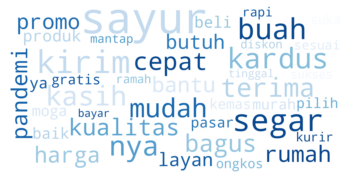

In [239]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

#wordcloud sentimen positif
content_pos = data['hasil praproses'][data['Sentiment'] == 1]
review_pos =''
for i in range(0,len(content_pos)):
    review_pos = ''.join([str(elem) for elem in content_pos])
STOPWORDS.add('sayurbox')
STOPWORDS.add("tidak")
STOPWORDS.add("aplikasi")
STOPWORDS.add("barang")
STOPWORDS.add("pesan")
STOPWORDS.add("belanja")
STOPWORDS.add("konsumen")
wc = WordCloud(stopwords=STOPWORDS, 
               background_color="white", max_words=40,
               max_font_size=256, random_state=42,
               width=2000, height=1000, colormap='Blues_r',
               collocations=False
              )
wc.generate(review_pos)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

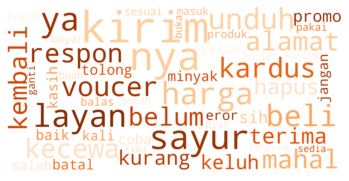

In [240]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

#wordcloud sentimen positif
content_neg = data['hasil praproses'][data['Sentiment'] == 0]
review_neg =''
for i in range(0,len(content_pos)):
    review_neg = ' '.join([str(elem) for elem in content_neg])
STOPWORDS.add('Sayurbox')
STOPWORDS.add("tidak")
STOPWORDS.add("aplikasi")
STOPWORDS.add("pesan")
STOPWORDS.add("barang")
STOPWORDS.add("belanja")
STOPWORDS.add("konsumen")
wc = WordCloud(stopwords=STOPWORDS, 
               background_color="white", max_words=50,
               max_font_size=256, random_state=42,
               width=2000, height=1000, colormap='Oranges_r',
               collocations=False)
wc.generate(review_neg)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [241]:
from collections import Counter
data['Month'] = data['Date'].dt.month_name(locale = 'English')
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month Year'] = data['Month'].astype(str) + ' '+ data['Year'].astype(str)
Counter(data['Month Year'])

Counter({'March 2022': 178,
         'February 2022': 117,
         'January 2022': 74,
         'December 2021': 49,
         'November 2021': 74,
         'October 2021': 95,
         'September 2021': 122,
         'August 2021': 74,
         'July 2021': 127})

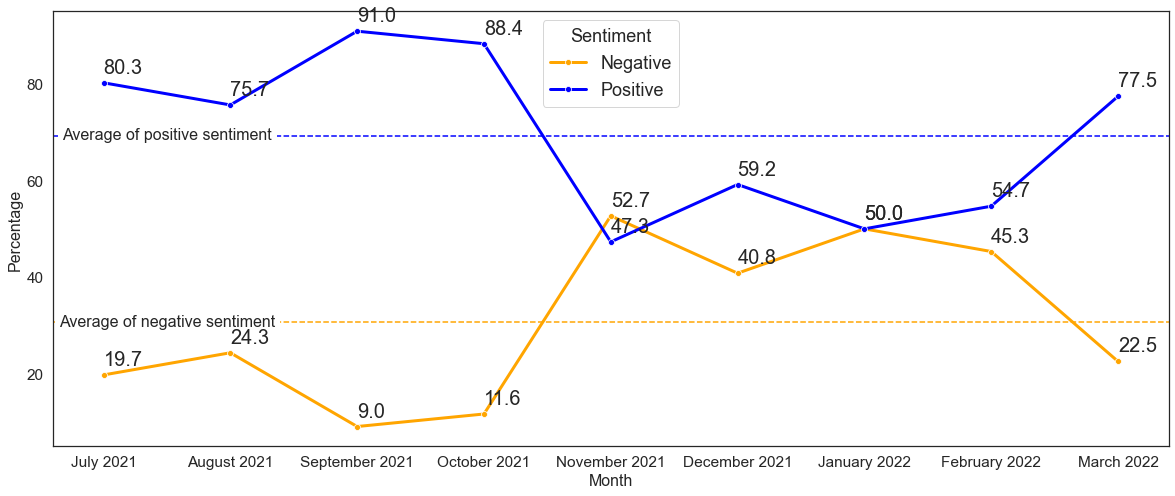

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data_baru = pd.read_excel('Month frek.xlsx')
persen = [80.3, 19.7, 75.7, 24.3, 91.0, 9.0, 88.4, 11.6, 52.7, 47.3, 59.2, 40.8,
         50.0, 50.0, 54.7, 45.3, 77.5, 22.5]
data_baru['persen'] = persen
# Set the figure size
plt.figure(figsize=(20, 8))

# grouped barplot
line = sns.lineplot(data = data_baru, x="Month Year", y= 'persen', hue='Sentiment', marker = 'o', linewidth=3, 
                    palette=['orange', 'blue'])
line.set_xlabel("Month", size=16)
line.set_ylabel("Percentage", size=16)

#Garis rata-rata sentimen positif
plt.axhline(y=69.34, color='blue', linestyle='--')
plt.text(0.5,69.5, 'Average of positive sentiment', fontsize=16, va='center', ha='center', backgroundcolor='w')

#Garis rata-rata sentimen negatif
plt.axhline(y=30.66, color='orange', linestyle='--')
plt.text(0.5,30.66, 'Average of negative sentiment', fontsize=16, va='center', ha='center', backgroundcolor='w')

for x, y in zip(data_baru['Month Year'], data_baru['persen']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, y = y + 2, s = '{:.1f}'.format(y), fontsize=20) 
    
plt.legend(labels=['Negative', 'Positive'], title='Sentiment', fontsize = '18', title_fontsize = "18", loc='upper center')



sns.set(font_scale=1.4)
sns.set_style('white')

In [243]:
data_baru

,Month Year,Sentiment,Frek,persen
0,July 2021,1,102,80.3
1,July 2021,0,25,19.7
2,August 2021,1,56,75.7
3,August 2021,0,18,24.3
4,September 2021,1,111,91.0
5,September 2021,0,11,9.0
6,October 2021,1,84,88.4
7,October 2021,0,11,11.6
8,November 2021,0,39,52.7
9,November 2021,1,35,47.3


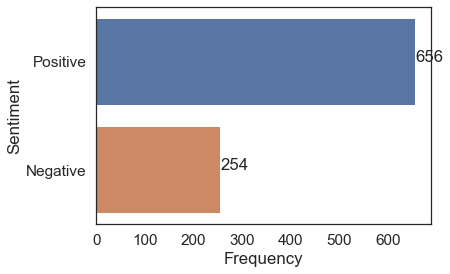

In [244]:
barchart1 = sns.countplot(data = data, y='Sentiment', order=[1, 0])
barchart1.set_yticklabels(['Positive', 'Negative'])
barchart1.set_xlabel("Frequency")

for p in barchart1.patches:
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height()/2
    barchart1.annotate('{:d}'.format(p.get_width()), (x,y))

# Multinomial Naive Bayes

## Unigram

In [245]:
#Mencari alpha optimal untuk unigram
alpha = []
from sklearn.model_selection import train_test_split
for i in range(21,31):
    X_train, X_test, y_train, y_test = train_test_split(data['hasil praproses'], data['Sentiment'], 
                                        test_size = 0.3, random_state=i)

    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer()

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)


    #Search alpha using cross validation
    from sklearn.naive_bayes import MultinomialNB

    # test the model for alpha = 0.1, 0.2, ..., 1.0
    import numpy as np
    parameters = [{'alpha':np.linspace(0,10,101)}]

    from sklearn.model_selection import GridSearchCV

    grid = GridSearchCV(MultinomialNB(), param_grid=parameters, n_jobs=-1, scoring ='roc_auc', cv=10, verbose=5)
    grid.fit(X_train_tfidf,y_train)
    cv_result = pd.DataFrame(grid.cv_results_)
    alpha.append(cv_result['param_alpha'][cv_result['rank_test_score'] == 1])

Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits


In [246]:
alpha

[7    0.7
 Name: param_alpha, dtype: object,
 7    0.7
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 5    0.5
 Name: param_alpha, dtype: object,
 4    0.4
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 9    0.9
 Name: param_alpha, dtype: object,
 8    0.8
 Name: param_alpha, dtype: object,
 7    0.7
 Name: param_alpha, dtype: object,
 4    0.4
 Name: param_alpha, dtype: object]

In [247]:
# perulangan biasa
list_akurasi_mnb_uni_train = []
list_sen_mnb_uni_train = []
list_spe_mnb_uni_train = []
list_f1_mnb_uni_train = []
list_auc_mnb_uni_train = []

list_akurasi_mnb_uni_tes = []
list_sen_mnb_uni_tes = []
list_spe_mnb_uni_tes = []
list_f1_mnb_uni_tes = []
list_auc_mnb_uni_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer()

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.naive_bayes import MultinomialNB
    if i == 21:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 22:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 23:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 24:
        mnb = MultinomialNB(alpha=0.5)
    elif i == 25:
        mnb = MultinomialNB(alpha=0.4)
    elif i == 26:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 27:
        mnb = MultinomialNB(alpha=0.9)
    elif i == 28:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 29:
        mnb = MultinomialNB(alpha=0.8)
    else:
        mnb = MultinomialNB(alpha=0.4)
    
    mnb.fit(X_train_tfidf, y_train)

    y_pred_mnb_train = mnb.predict(X_train_tfidf)
    y_pred_mnb_tes = mnb.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_mnb_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_mnb_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_mnb_train)
    list_akurasi_mnb_uni_train.append(accuracy1)
    list_sen_mnb_uni_train.append(sen1)
    list_spe_mnb_uni_train.append(spe1)
    list_f1_mnb_uni_train.append(f11)
    list_auc_mnb_uni_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_mnb_tes)
    list_akurasi_mnb_uni_tes.append(accuracy2)
    list_sen_mnb_uni_tes.append(sen2)
    list_spe_mnb_uni_tes.append(spe2)
    list_f1_mnb_uni_tes.append(f12)
    list_auc_mnb_uni_tes.append(auc2)

In [248]:
# perulangan biasa
list_akurasi_mnb_uni_train = []
list_sen_mnb_uni_train = []
list_spe_mnb_uni_train = []
list_f1_mnb_uni_train = []
list_auc_mnb_uni_train = []

list_akurasi_mnb_uni_tes = []
list_sen_mnb_uni_tes = []
list_spe_mnb_uni_tes = []
list_f1_mnb_uni_tes = []
list_auc_mnb_uni_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer()

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.naive_bayes import MultinomialNB
    if i == 21:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 22:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 23:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 24:
        mnb = MultinomialNB(alpha=0.5)
    elif i == 25:
        mnb = MultinomialNB(alpha=0.4)
    elif i == 26:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 27:
        mnb = MultinomialNB(alpha=0.9)
    elif i == 28:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 29:
        mnb = MultinomialNB(alpha=0.8)
    else:
        mnb = MultinomialNB(alpha=0.4)
    
    mnb.fit(X_train_tfidf, y_train)

    y_pred_mnb_train = mnb.predict(X_train_tfidf)
    y_pred_mnb_tes = mnb.predict(X_test_tfidf)
    prob = mnb.predict_proba(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_mnb_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_mnb_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_mnb_train)
    list_akurasi_mnb_uni_train.append(accuracy1)
    list_sen_mnb_uni_train.append(sen1)
    list_spe_mnb_uni_train.append(spe1)
    list_f1_mnb_uni_train.append(f11)
    list_auc_mnb_uni_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_mnb_tes)
    list_akurasi_mnb_uni_tes.append(accuracy2)
    list_sen_mnb_uni_tes.append(sen2)
    list_spe_mnb_uni_tes.append(spe2)
    list_f1_mnb_uni_tes.append(f12)
    list_auc_mnb_uni_tes.append(auc2)

In [249]:
prob

array([[0.8970509 , 0.1029491 ],
       [0.02278935, 0.97721065],
       [0.91201251, 0.08798749],
       [0.0395746 , 0.9604254 ],
       [0.00271859, 0.99728141],
       [0.41044256, 0.58955744],
       [0.00965459, 0.99034541],
       [0.19719608, 0.80280392],
       [0.12751004, 0.87248996],
       [0.80995068, 0.19004932],
       [0.02427238, 0.97572762],
       [0.7933529 , 0.2066471 ],
       [0.09578594, 0.90421406],
       [0.04394517, 0.95605483],
       [0.12157098, 0.87842902],
       [0.71100005, 0.28899995],
       [0.10756884, 0.89243116],
       [0.02522001, 0.97477999],
       [0.01833872, 0.98166128],
       [0.12600944, 0.87399056],
       [0.44590456, 0.55409544],
       [0.01225883, 0.98774117],
       [0.04481493, 0.95518507],
       [0.02555975, 0.97444025],
       [0.03739544, 0.96260456],
       [0.49528901, 0.50471099],
       [0.01347271, 0.98652729],
       [0.01442537, 0.98557463],
       [0.04577442, 0.95422558],
       [0.00198679, 0.99801321],
       [0.

## Bigram

In [250]:
#Mencari alpha optimal untuk bigram
alpha = []
from sklearn.model_selection import train_test_split
for i in range(21,31):
    X_train, X_test, y_train, y_test = train_test_split(data['hasil praproses'], data['Sentiment'], 
                                        test_size = 0.3, random_state=i)

    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(2,2))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)


    #Search alpha using cross validation
    from sklearn.naive_bayes import MultinomialNB

    # test the model for alpha = 0.1, 0.2, ..., 1.0
    import numpy as np
    parameters = [{'alpha':np.linspace(0,10,101)}]

    from sklearn.model_selection import GridSearchCV

    grid = GridSearchCV(MultinomialNB(), param_grid=parameters, n_jobs=-1, scoring ='roc_auc', cv=10, verbose=5)
    grid.fit(X_train_tfidf,y_train)
    cv_result = pd.DataFrame(grid.cv_results_)
    alpha.append(cv_result['param_alpha'][cv_result['rank_test_score'] == 1])

Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits


In [251]:
alpha

[5    0.5
 Name: param_alpha, dtype: object,
 5    0.5
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 3    0.3
 Name: param_alpha, dtype: object,
 5    0.5
 Name: param_alpha, dtype: object,
 2    0.2
 Name: param_alpha, dtype: object,
 3    0.3
 Name: param_alpha, dtype: object,
 5    0.5
 Name: param_alpha, dtype: object,
 3    0.3
 Name: param_alpha, dtype: object]

In [252]:
list_akurasi_mnb_bi_train = []
list_sen_mnb_bi_train = []
list_spe_mnb_bi_train = []
list_f1_mnb_bi_train = []
list_auc_mnb_bi_train = []

list_akurasi_mnb_bi_tes = []
list_sen_mnb_bi_tes = []
list_spe_mnb_bi_tes = []
list_f1_mnb_bi_tes = []
list_auc_mnb_bi_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(2,2))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)

    
    from sklearn.naive_bayes import MultinomialNB
    if i == 21:
        mnb = MultinomialNB(alpha=0.5)
    elif i == 22:
        mnb = MultinomialNB(alpha=0.5)
    elif i == 23:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 24:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 25:
        mnb = MultinomialNB(alpha=0.3)
    elif i == 26:
        mnb = MultinomialNB(alpha=0.5)
    elif i == 27:
        mnb = MultinomialNB(alpha=0.2)
    elif i == 28:
        mnb = MultinomialNB(alpha=0.3)
    elif i == 29:
        mnb = MultinomialNB(alpha=0.5)
    else:
        mnb = MultinomialNB(alpha=0.3)
    mnb.fit(X_train_tfidf, y_train)

    y_pred_mnb_train = mnb.predict(X_train_tfidf)
    y_pred_mnb_tes = mnb.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_mnb_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_mnb_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_mnb_train)
    list_akurasi_mnb_bi_train.append(accuracy1)
    list_sen_mnb_bi_train.append(sen1)
    list_spe_mnb_bi_train.append(spe1)
    list_f1_mnb_bi_train.append(f11)
    list_auc_mnb_bi_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_mnb_tes)
    list_akurasi_mnb_bi_tes.append(accuracy2)
    list_sen_mnb_bi_tes.append(sen2)
    list_spe_mnb_bi_tes.append(spe2)
    list_f1_mnb_bi_tes.append(f12)
    list_auc_mnb_bi_tes.append(auc2)

## Trigram 

In [253]:
#Mencari alpha optimal untuk trigram
alpha = []
from sklearn.model_selection import train_test_split
for i in range(21,31):
    X_train, X_test, y_train, y_test = train_test_split(data['hasil praproses'], data['Sentiment'], 
                                        test_size = 0.3, random_state=i)

    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(3,3))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)


    #Search alpha using cross validation
    from sklearn.naive_bayes import MultinomialNB

    # test the model for alpha = 0.1, 0.2, ..., 10.0
    import numpy as np
    parameters = [{'alpha':np.linspace(0.0,20,200)}]

    from sklearn.model_selection import GridSearchCV

    grid = GridSearchCV(MultinomialNB(), param_grid=parameters, n_jobs=-1, scoring ='roc_auc', cv=10, verbose=5)
    grid.fit(X_train_tfidf,y_train)
    cv_result = pd.DataFrame(grid.cv_results_)
    alpha.append(cv_result['param_alpha'][cv_result['rank_test_score'] == 1])

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [254]:
alpha

[0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object]

In [255]:
list_akurasi_mnb_tri_train = []
list_sen_mnb_tri_train = []
list_spe_mnb_tri_train = []
list_f1_mnb_tri_train = []
list_auc_mnb_tri_train = []

list_akurasi_mnb_tri_tes = []
list_sen_mnb_tri_tes = []
list_spe_mnb_tri_tes = []
list_f1_mnb_tri_tes = []
list_auc_mnb_tri_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(3,3))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)

    
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train_tfidf, y_train)

    y_pred_mnb_train = mnb.predict(X_train_tfidf)
    y_pred_mnb_tes = mnb.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_mnb_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_mnb_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_mnb_train)
    list_akurasi_mnb_tri_train.append(accuracy1)
    list_sen_mnb_tri_train.append(sen1)
    list_spe_mnb_tri_train.append(spe1)
    list_f1_mnb_tri_train.append(f11)
    list_auc_mnb_tri_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_mnb_tes)
    list_akurasi_mnb_tri_tes.append(accuracy2)
    list_sen_mnb_tri_tes.append(sen2)
    list_spe_mnb_tri_tes.append(spe2)
    list_f1_mnb_tri_tes.append(f12)
    list_auc_mnb_tri_tes.append(auc2)

In [256]:
list_akurasi_mnb_tri_tes

[0.7729,
 0.7253,
 0.6923,
 0.7473,
 0.7509,
 0.7179,
 0.6886,
 0.7179,
 0.7216,
 0.7216]

## Unigram + Bigram

In [257]:
#Mencari alpha optimal untuk unibigram
alpha = []
from sklearn.model_selection import train_test_split
for i in range(21,31):
    X_train, X_test, y_train, y_test = train_test_split(data['hasil praproses'], data['Sentiment'], 
                                        test_size = 0.3, random_state=i)

    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(1,2))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)


    #Search alpha using cross validation
    from sklearn.naive_bayes import MultinomialNB

    # test the model for alpha = 0.1, 0.2, ..., 10.0
    import numpy as np
    parameters = [{'alpha':np.linspace(0,10,101)}]

    from sklearn.model_selection import GridSearchCV

    grid = GridSearchCV(MultinomialNB(), param_grid=parameters, n_jobs=-1, scoring ='roc_auc', cv=10, verbose=5)
    grid.fit(X_train_tfidf,y_train)
    cv_result = pd.DataFrame(grid.cv_results_)
    alpha.append(cv_result['param_alpha'][cv_result['rank_test_score'] == 1])

Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits


In [258]:
alpha

[6    0.6
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 5    0.5
 Name: param_alpha, dtype: object,
 2    0.2
 Name: param_alpha, dtype: object,
 2    0.2
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 4    0.4
 Name: param_alpha, dtype: object,
 2    0.2
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 4    0.4
 Name: param_alpha, dtype: object]

In [259]:
#perulangan biasa
list_akurasi_mnb_unibi_train = []
list_sen_mnb_unibi_train = []
list_spe_mnb_unibi_train = []
list_f1_mnb_unibi_train = []
list_auc_mnb_unibi_train = []

list_akurasi_mnb_unibi_tes = []
list_sen_mnb_unibi_tes = []
list_spe_mnb_unibi_tes = []
list_f1_mnb_unibi_tes = []
list_auc_mnb_unibi_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(1,2))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.naive_bayes import MultinomialNB
    if i == 21:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 22:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 23:
        mnb = MultinomialNB(alpha=0.5)
    elif i == 24:
        mnb = MultinomialNB(alpha=0.2)
    elif i == 25:
        mnb = MultinomialNB(alpha=0.2)
    elif i == 26:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 27:
        mnb = MultinomialNB(alpha=0.4)
    elif i == 28:
        mnb = MultinomialNB(alpha=0.2)
    elif i == 29:
        mnb = MultinomialNB(alpha=0.6)
    else:
        mnb = MultinomialNB(alpha=0.4)
    mnb.fit(X_train_tfidf, y_train)

    y_pred_mnb_train = mnb.predict(X_train_tfidf)
    y_pred_mnb_tes = mnb.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_mnb_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_mnb_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_mnb_train)
    list_akurasi_mnb_unibi_train.append(accuracy1)
    list_sen_mnb_unibi_train.append(sen1)
    list_spe_mnb_unibi_train.append(spe1)
    list_f1_mnb_unibi_train.append(f11)
    list_auc_mnb_unibi_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_mnb_tes)
    list_akurasi_mnb_unibi_tes.append(accuracy2)
    list_sen_mnb_unibi_tes.append(sen2)
    list_spe_mnb_unibi_tes.append(spe2)
    list_f1_mnb_unibi_tes.append(f12)
    list_auc_mnb_unibi_tes.append(auc2)

## Bigram + Trigram

In [260]:
#Mencari alpha optimal untuk bitrigram
alpha = []
from sklearn.model_selection import train_test_split
for i in range(21,31):
    X_train, X_test, y_train, y_test = train_test_split(data['hasil praproses'], data['Sentiment'], 
                                        test_size = 0.3, random_state=i)

    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(2,3))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)


    #Search alpha using cross validation
    from sklearn.naive_bayes import MultinomialNB

    # test the model for alpha = 0.1, 0.2, ..., 10.0
    import numpy as np
    parameters = [{'alpha':np.linspace(0,10,101)}]

    from sklearn.model_selection import GridSearchCV

    grid = GridSearchCV(MultinomialNB(), param_grid=parameters, n_jobs=-1, scoring ='roc_auc', cv=10, verbose=5)
    grid.fit(X_train_tfidf,y_train)
    cv_result = pd.DataFrame(grid.cv_results_)
    alpha.append(cv_result['param_alpha'][cv_result['rank_test_score'] == 1])

Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 101 candidates, totalling 1010 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 101 candidates, totalling 1010 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 10 folds for each of 101 candidates, totalling 1010 fits


In [261]:
alpha

[31    3.1
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 7    0.7
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 9    0.9
 Name: param_alpha, dtype: object,
 8    0.8
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 0    0.0
 Name: param_alpha, dtype: object,
 7    0.7
 Name: param_alpha, dtype: object]

In [262]:
list_akurasi_mnb_bitri_train = []
list_sen_mnb_bitri_train = []
list_spe_mnb_bitri_train = []
list_f1_mnb_bitri_train = []
list_auc_mnb_bitri_train = []

list_akurasi_mnb_bitri_tes = []
list_sen_mnb_bitri_tes = []
list_spe_mnb_bitri_tes = []
list_f1_mnb_bitri_tes = []
list_auc_mnb_bitri_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(2,3))

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.naive_bayes import MultinomialNB
    if i == 21:
        mnb = MultinomialNB(alpha=3.1)
    elif i == 22:
        mnb = MultinomialNB()
    elif i == 23:
        mnb = MultinomialNB()
    elif i == 24:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 25:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 26:
        mnb = MultinomialNB(alpha=0.9)
    elif i == 27:
        mnb = MultinomialNB(alpha=0.8)
    elif i == 28:
        mnb = MultinomialNB()
    elif i == 29:
        mnb = MultinomialNB()
    else:
        mnb = MultinomialNB(alpha=0.7)
    mnb.fit(X_train_tfidf, y_train)

    y_pred_mnb_train = mnb.predict(X_train_tfidf)
    y_pred_mnb_tes = mnb.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_mnb_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_mnb_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_mnb_train)
    list_akurasi_mnb_bitri_train.append(accuracy1)
    list_sen_mnb_bitri_train.append(sen1)
    list_spe_mnb_bitri_train.append(spe1)
    list_f1_mnb_bitri_train.append(f11)
    list_auc_mnb_bitri_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_mnb_tes)
    list_akurasi_mnb_bitri_tes.append(accuracy2)
    list_sen_mnb_bitri_tes.append(sen2)
    list_spe_mnb_bitri_tes.append(spe2)
    list_f1_mnb_bitri_tes.append(f12)
    list_auc_mnb_bitri_tes.append(auc2)

## Unigram + Trigram

In [263]:
#Mencari alpha optimal untuk unitrigram
alpha = []
from sklearn.model_selection import train_test_split
for i in range(21,31):
    X_train, X_test, y_train, y_test = train_test_split(data['hasil praproses'], data['Sentiment'], 
                                        test_size = 0.3, random_state=i)

    from sklearn.feature_extraction.text import TfidfVectorizer
    tf1 = TfidfVectorizer(ngram_range = (1,1))
    tf2 = TfidfVectorizer(ngram_range = (3,3))

    from sklearn.pipeline import FeatureUnion
    tf = FeatureUnion([('unigram', tf1), ('trigram', tf2)])
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)

    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)


    #Search alpha using cross validation
    from sklearn.naive_bayes import MultinomialNB

    # test the model for alpha = 0.1, 0.2, ..., 10.0
    import numpy as np
    parameters = [{'alpha':np.linspace(0,10,101)}]

    from sklearn.model_selection import GridSearchCV

    grid = GridSearchCV(MultinomialNB(), param_grid=parameters, n_jobs=-1, scoring ='roc_auc', cv=10, verbose=5)
    grid.fit(X_train_tfidf,y_train)
    cv_result = pd.DataFrame(grid.cv_results_)
    alpha.append(cv_result['param_alpha'][cv_result['rank_test_score'] == 1])

Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits
Fitting 10 folds for each of 101 candidates, totalling 1010 fits


In [264]:
alpha

[7    0.7
 Name: param_alpha, dtype: object,
 8    0.8
 Name: param_alpha, dtype: object,
 7    0.7
 Name: param_alpha, dtype: object,
 7    0.7
 Name: param_alpha, dtype: object,
 5    0.5
 Name: param_alpha, dtype: object,
 8    0.8
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 6    0.6
 Name: param_alpha, dtype: object,
 7    0.7
 Name: param_alpha, dtype: object,
 4    0.4
 Name: param_alpha, dtype: object]

In [265]:
list_akurasi_mnb_unitri_train = []
list_sen_mnb_unitri_train = []
list_spe_mnb_unitri_train = []
list_f1_mnb_unitri_train = []
list_auc_mnb_unitri_train = []

list_akurasi_mnb_unitri_tes = []
list_sen_mnb_unitri_tes = []
list_spe_mnb_unitri_tes = []
list_f1_mnb_unitri_tes = []
list_auc_mnb_unitri_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf1 = TfidfVectorizer(ngram_range = (1,1))
    tf2 = TfidfVectorizer(ngram_range = (3,3))

    from sklearn.pipeline import FeatureUnion
    tf = FeatureUnion([('unigram', tf1), ('trigram', tf2)])
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.naive_bayes import MultinomialNB
    if i == 21:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 22:
        mnb = MultinomialNB(alpha=0.8)
    elif i == 23:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 24:
        mnb = MultinomialNB(alpha=0.7)
    elif i == 25:
        mnb = MultinomialNB(alpha=0.5)
    elif i == 26:
        mnb = MultinomialNB(alpha=0.8)
    elif i == 27:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 28:
        mnb = MultinomialNB(alpha=0.6)
    elif i == 29:
        mnb = MultinomialNB(alpha=0.7)
    else:
        mnb = MultinomialNB(alpha=0.4)
    mnb.fit(X_train_tfidf, y_train)

    y_pred_mnb_train = mnb.predict(X_train_tfidf)
    y_pred_mnb_tes = mnb.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_mnb_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_mnb_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_mnb_train)
    list_akurasi_mnb_unitri_train.append(accuracy1)
    list_sen_mnb_unitri_train.append(sen1)
    list_spe_mnb_unitri_train.append(spe1)
    list_f1_mnb_unitri_train.append(f11)
    list_auc_mnb_unitri_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_mnb_tes)
    list_akurasi_mnb_unitri_tes.append(accuracy2)
    list_sen_mnb_unitri_tes.append(sen2)
    list_spe_mnb_unitri_tes.append(spe2)
    list_f1_mnb_unitri_tes.append(f12)
    list_auc_mnb_unitri_tes.append(auc2)

# Logistic Regression

## Unigram

In [266]:
#perulangan biasa
list_akurasi_lr_uni_train = []
list_sen_lr_uni_train = []
list_spe_lr_uni_train = []
list_f1_lr_uni_train = []
list_auc_lr_uni_train = []

list_akurasi_lr_uni_tes = []
list_sen_lr_uni_tes = []
list_spe_lr_uni_tes = []
list_f1_lr_uni_tes = []
list_auc_lr_uni_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer()
    
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train_tfidf, y_train)

    y_pred_lr_train = lr.predict(X_train_tfidf)
    y_pred_lr_tes = lr.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_lr_train)
    list_akurasi_lr_uni_train.append(accuracy1)
    list_sen_lr_uni_train.append(sen1)
    list_spe_lr_uni_train.append(spe1)
    list_f1_lr_uni_train.append(f11)
    list_auc_lr_uni_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    list_akurasi_lr_uni_tes.append(accuracy2)
    list_sen_lr_uni_tes.append(sen2)
    list_spe_lr_uni_tes.append(spe2)
    list_f1_lr_uni_tes.append(f12)
    list_auc_lr_uni_tes.append(auc2)

In [267]:
#perulangan biasa
list_akurasi_lr_uni_train = []
list_sen_lr_uni_train = []
list_spe_lr_uni_train = []
list_f1_lr_uni_train = []
list_auc_lr_uni_train = []

list_akurasi_lr_uni_tes = []
list_sen_lr_uni_tes = []
list_spe_lr_uni_tes = []
list_f1_lr_uni_tes = []
list_auc_lr_uni_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer()
    
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train_tfidf, y_train)

    y_pred_lr_train = lr.predict(X_train_tfidf)
    y_pred_lr_tes = lr.predict(X_test_tfidf)
    prob = lr.predict_proba(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_lr_train)
    list_akurasi_lr_uni_train.append(accuracy1)
    list_sen_lr_uni_train.append(sen1)
    list_spe_lr_uni_train.append(spe1)
    list_f1_lr_uni_train.append(f11)
    list_auc_lr_uni_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    list_akurasi_lr_uni_tes.append(accuracy2)
    list_sen_lr_uni_tes.append(sen2)
    list_spe_lr_uni_tes.append(spe2)
    list_f1_lr_uni_tes.append(f12)
    list_auc_lr_uni_tes.append(auc2)

In [268]:
prob

array([[0.64031739, 0.35968261],
       [0.12872084, 0.87127916],
       [0.7166549 , 0.2833451 ],
       [0.07863601, 0.92136399],
       [0.04677774, 0.95322226],
       [0.47859308, 0.52140692],
       [0.03476338, 0.96523662],
       [0.46959476, 0.53040524],
       [0.27478549, 0.72521451],
       [0.73585426, 0.26414574],
       [0.13756562, 0.86243438],
       [0.90815568, 0.09184432],
       [0.30615088, 0.69384912],
       [0.2092379 , 0.7907621 ],
       [0.23061743, 0.76938257],
       [0.43876616, 0.56123384],
       [0.6000693 , 0.3999307 ],
       [0.13477352, 0.86522648],
       [0.12423445, 0.87576555],
       [0.29025622, 0.70974378],
       [0.63727558, 0.36272442],
       [0.16205698, 0.83794302],
       [0.16877763, 0.83122237],
       [0.13654526, 0.86345474],
       [0.15544938, 0.84455062],
       [0.70455357, 0.29544643],
       [0.07752246, 0.92247754],
       [0.16949936, 0.83050064],
       [0.15924828, 0.84075172],
       [0.01607246, 0.98392754],
       [0.

## Bigram 

In [269]:
#perulangan biasa
list_akurasi_lr_bi_train = []
list_sen_lr_bi_train = []
list_spe_lr_bi_train = []
list_f1_lr_bi_train = []
list_auc_lr_bi_train = []

list_akurasi_lr_bi_tes = []
list_sen_lr_bi_tes = []
list_spe_lr_bi_tes = []
list_f1_lr_bi_tes = []
list_auc_lr_bi_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(2,2))
    
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train_tfidf, y_train)

    y_pred_lr_train = lr.predict(X_train_tfidf)
    y_pred_lr_tes = lr.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_lr_train)
    list_akurasi_lr_bi_train.append(accuracy1)
    list_sen_lr_bi_train.append(sen1)
    list_spe_lr_bi_train.append(spe1)
    list_f1_lr_bi_train.append(f11)
    list_auc_lr_bi_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    list_akurasi_lr_bi_tes.append(accuracy2)
    list_sen_lr_bi_tes.append(sen2)
    list_spe_lr_bi_tes.append(spe2)
    list_f1_lr_bi_tes.append(f12)
    list_auc_lr_bi_tes.append(auc2)

## Trigram

In [270]:
#perulangan trigram
list_akurasi_lr_tri_train = []
list_sen_lr_tri_train = []
list_spe_lr_tri_train = []
list_f1_lr_tri_train = []
list_auc_lr_tri_train = []

list_akurasi_lr_tri_tes = []
list_sen_lr_tri_tes = []
list_spe_lr_tri_tes = []
list_f1_lr_tri_tes = []
list_auc_lr_tri_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(3,3))
    
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train_tfidf, y_train)

    y_pred_lr_train = lr.predict(X_train_tfidf)
    y_pred_lr_tes = lr.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_lr_train)
    list_akurasi_lr_tri_train.append(accuracy1)
    list_sen_lr_tri_train.append(sen1)
    list_spe_lr_tri_train.append(spe1)
    list_f1_lr_tri_train.append(f11)
    list_auc_lr_tri_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    list_akurasi_lr_tri_tes.append(accuracy2)
    list_sen_lr_tri_tes.append(sen2)
    list_spe_lr_tri_tes.append(spe2)
    list_f1_lr_tri_tes.append(f12)
    list_auc_lr_tri_tes.append(auc2)

## Unigram + Bigram

In [271]:
#perulangan unibigram
list_akurasi_lr_unibi_train = []
list_sen_lr_unibi_train = []
list_spe_lr_unibi_train = []
list_f1_lr_unibi_train = []
list_auc_lr_unibi_train = []

list_akurasi_lr_unibi_tes = []
list_sen_lr_unibi_tes = []
list_spe_lr_unibi_tes = []
list_f1_lr_unibi_tes = []
list_auc_lr_unibi_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(1,2))
    
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train_tfidf, y_train)

    y_pred_lr_train = lr.predict(X_train_tfidf)
    y_pred_lr_tes = lr.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_lr_train)
    list_akurasi_lr_unibi_train.append(accuracy1)
    list_sen_lr_unibi_train.append(sen1)
    list_spe_lr_unibi_train.append(spe1)
    list_f1_lr_unibi_train.append(f11)
    list_auc_lr_unibi_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    list_akurasi_lr_unibi_tes.append(accuracy2)
    list_sen_lr_unibi_tes.append(sen2)
    list_spe_lr_unibi_tes.append(spe2)
    list_f1_lr_unibi_tes.append(f12)
    list_auc_lr_unibi_tes.append(auc2)

## Bigram + Trigram

In [272]:
#perulangan biasa
list_akurasi_lr_bitri_train = []
list_sen_lr_bitri_train = []
list_spe_lr_bitri_train = []
list_f1_lr_bitri_train = []
list_auc_lr_bitri_train = []

list_akurasi_lr_bitri_tes = []
list_sen_lr_bitri_tes = []
list_spe_lr_bitri_tes = []
list_f1_lr_bitri_tes = []
list_auc_lr_bitri_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf = TfidfVectorizer(ngram_range=(2,3))
    
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train_tfidf, y_train)

    y_pred_lr_train = lr.predict(X_train_tfidf)
    y_pred_lr_tes = lr.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_lr_train)
    list_akurasi_lr_bitri_train.append(accuracy1)
    list_sen_lr_bitri_train.append(sen1)
    list_spe_lr_bitri_train.append(spe1)
    list_f1_lr_bitri_train.append(f11)
    list_auc_lr_bitri_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    list_akurasi_lr_bitri_tes.append(accuracy2)
    list_sen_lr_bitri_tes.append(sen2)
    list_spe_lr_bitri_tes.append(spe2)
    list_f1_lr_bitri_tes.append(f12)
    list_auc_lr_bitri_tes.append(auc2)

## Unigram + Trigram

In [273]:
#perulangan biasa
list_akurasi_lr_unitri_train = []
list_sen_lr_unitri_train = []
list_spe_lr_unitri_train = []
list_f1_lr_unitri_train = []
list_auc_lr_unitri_train = []

list_akurasi_lr_unitri_tes = []
list_sen_lr_unitri_tes = []
list_spe_lr_unitri_tes = []
list_f1_lr_unitri_tes = []
list_auc_lr_unitri_tes = []

from sklearn.model_selection import train_test_split

for i in range(21,31):
    data_train, data_test = train_test_split(data, test_size = 0.3, random_state = i)
    X_train = data_train['hasil praproses']
    y_train = data_train['Sentiment']
    X_test = data_test['hasil praproses']
    y_test = data_test['Sentiment']
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf1 = TfidfVectorizer(ngram_range = (1,1))
    tf2 = TfidfVectorizer(ngram_range = (3,3))

    from sklearn.pipeline import FeatureUnion
    tf = FeatureUnion([('unigram', tf1), ('trigram', tf2)])
    
    #Vectorizing the text data
    X_train_tfidf = tf.fit_transform(X_train)
    X_test_tfidf = tf.transform(X_test)
    
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train_tfidf, y_train)

    y_pred_lr_train = lr.predict(X_train_tfidf)
    y_pred_lr_tes = lr.predict(X_test_tfidf)
    
    from sklearn.metrics import confusion_matrix
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
    accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
    sen1 = round(tp1/(tp1 + fn1), 4)
    spe1 = round(tn1/(tn1+fp1), 4)
    f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
    from sklearn.metrics import roc_auc_score
    auc1 = roc_auc_score(y_train, y_pred_lr_train)
    list_akurasi_lr_unitri_train.append(accuracy1)
    list_sen_lr_unitri_train.append(sen1)
    list_spe_lr_unitri_train.append(spe1)
    list_f1_lr_unitri_train.append(f11)
    list_auc_lr_unitri_train.append(auc1)

    accuracy2 = round((tp2 + tn2)/(tp2 + tn2 + fp2 + fn2), 4)
    sen2 = round(tp2/(tp2 + fn2), 4)
    spe2 = round(tn2/(tn2 + fp2), 4)
    f12 = round(2*tp2/(2*tp2 + fp2 + fn2), 4)
    from sklearn.metrics import roc_auc_score
    auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    list_akurasi_lr_unitri_tes.append(accuracy2)
    list_sen_lr_unitri_tes.append(sen2)
    list_spe_lr_unitri_tes.append(spe2)
    list_f1_lr_unitri_tes.append(f12)
    list_auc_lr_unitri_tes.append(auc2)

# Evaluation

In [274]:
akurasi_tes = {'mnb_uni_tes' : list_akurasi_mnb_uni_tes, 'mnb_bi_tes' : list_akurasi_mnb_bi_tes,
                 'mnb_tri_tes' : list_akurasi_mnb_tri_tes,'mnb_unibi_tes' : list_akurasi_mnb_unibi_tes, 
                 'mnb_unitri_tes' : list_akurasi_mnb_unitri_tes, 'mnb_bitri_tes' : list_akurasi_mnb_bitri_tes,
                  'lr_uni_tes' : list_akurasi_lr_uni_tes, 
                 'lr_bi_tes' : list_akurasi_lr_bi_tes, 'lr_tri_tes' : list_akurasi_lr_tri_tes, 
                 'lr_unibi_tes' : list_akurasi_lr_unibi_tes, 'lr_unitri_tes' : list_akurasi_lr_unitri_tes,
                 'lr_bitri_tes' : list_akurasi_lr_bitri_tes}
akurasi_tes = pd.DataFrame(akurasi_tes)
akurasi_tes.to_excel('akurasi_tes.xlsx', index=False, header=True)

In [275]:
sen_tes = {'mnb_uni_tes' : list_sen_mnb_uni_tes, 'mnb_bi_tes' : list_sen_mnb_bi_tes,
                 'mnb_tri_tes' : list_sen_mnb_tri_tes,'mnb_unibi_tes' : list_sen_mnb_unibi_tes, 
                 'mnb_unitri_tes' : list_sen_mnb_unitri_tes, 'mnb_bitri_tes' : list_sen_mnb_bitri_tes,
                'lr_uni_tes' : list_sen_lr_uni_tes, 
                 'lr_bi_tes' : list_sen_lr_bi_tes, 'lr_tri_tes' : list_sen_lr_tri_tes, 
                 'lr_unibi_tes' : list_sen_lr_unibi_tes, 'lr_unitri_tes' : list_sen_lr_unitri_tes,
                 'lr_bitri_tes' : list_sen_lr_bitri_tes}
sen_tes = pd.DataFrame(sen_tes)
sen_tes.to_excel('sen_tes.xlsx', index=False, header=True)

In [276]:
spe_tes = {'mnb_uni_tes' : list_spe_mnb_uni_tes, 'mnb_bi_tes' : list_spe_mnb_bi_tes,
                 'mnb_tri_tes' : list_spe_mnb_tri_tes,'mnb_unibi_tes' : list_spe_mnb_unibi_tes, 
                 'mnb_unitri_tes' : list_spe_mnb_unitri_tes, 'mnb_bitri_tes' : list_spe_mnb_bitri_tes,
                 'lr_uni_tes' : list_spe_lr_uni_tes, 
                 'lr_bi_tes' : list_spe_lr_bi_tes, 'lr_tri_tes' : list_spe_lr_tri_tes, 
                 'lr_unibi_tes' : list_spe_lr_unibi_tes, 'lr_unitri_tes' : list_spe_lr_unitri_tes,
                 'lr_bitri_tes' : list_spe_lr_bitri_tes}
spe_tes = pd.DataFrame(spe_tes)
spe_tes.to_excel('spe_tes.xlsx', index=False, header=True)

In [277]:
f1_tes = {'mnb_uni_tes' : list_f1_mnb_uni_tes, 'mnb_bi_tes' : list_f1_mnb_bi_tes,
                 'mnb_tri_tes' : list_f1_mnb_tri_tes,'mnb_unibi_tes' : list_f1_mnb_unibi_tes, 
                 'mnb_unitri_tes' : list_f1_mnb_unitri_tes, 'mnb_bitri_tes' : list_f1_mnb_bitri_tes,
                 'lr_uni_tes' : list_f1_lr_uni_tes, 
                 'lr_bi_tes' : list_f1_lr_bi_tes, 'lr_tri_tes' : list_f1_lr_tri_tes, 
                 'lr_unibi_tes' : list_f1_lr_unibi_tes, 'lr_unitri_tes' : list_f1_lr_unitri_tes,
                 'lr_bitri_tes' : list_f1_lr_bitri_tes}
f1_tes = pd.DataFrame(f1_tes)
f1_tes.to_excel('f1_tes.xlsx', index=False, header=True)

In [278]:
auc_tes = {'mnb_uni_tes' : list_auc_mnb_uni_tes, 'mnb_bi_tes' : list_auc_mnb_bi_tes,
                 'mnb_tri_tes' : list_auc_mnb_tri_tes,'mnb_unibi_tes' : list_auc_mnb_unibi_tes, 
                 'mnb_unitri_tes' : list_auc_mnb_unitri_tes, 'mnb_bitri_tes' : list_auc_mnb_bitri_tes,
                  'lr_uni_tes' : list_auc_lr_uni_tes, 
                 'lr_bi_tes' : list_auc_lr_bi_tes, 'lr_tri_tes' : list_auc_lr_tri_tes, 
                 'lr_unibi_tes' : list_auc_lr_unibi_tes, 'lr_unitri_tes' : list_auc_lr_unitri_tes,
                 'lr_bitri_tes' : list_auc_lr_bitri_tes}
auc_tes = pd.DataFrame(auc_tes)
auc_tes.to_excel('auc_tes.xlsx', index=False, header=True)

In [344]:
f1_tes

,mnb_uni_tes,mnb_bi_tes,mnb_tri_tes,mnb_unibi_tes,mnb_unitri_tes,mnb_bitri_tes,lr_uni_tes,lr_bi_tes,lr_tri_tes,lr_unibi_tes,lr_unitri_tes,lr_bitri_tes
0,0.9206,0.9187,0.8714,0.9248,0.9119,0.8719,0.9352,0.8913,0.8719,0.9452,0.9376,0.8828
1,0.9069,0.8758,0.8401,0.8981,0.8798,0.8467,0.9310,0.8467,0.8383,0.9301,0.9324,0.8419
2,0.8873,0.8500,0.8182,0.8712,0.8455,0.8228,0.9158,0.8228,0.8182,0.8921,0.9091,0.8200
3,0.9349,0.8958,0.8553,0.9387,0.9058,0.8908,0.9429,0.8670,0.8553,0.9387,0.9431,0.8589
4,0.9238,0.9037,0.8565,0.9333,0.8980,0.8772,0.9264,0.8608,0.8529,0.9120,0.9180,0.8602
5,0.9125,0.8680,0.8358,0.8813,0.8719,0.8467,0.9294,0.8412,0.8358,0.9061,0.9279,0.8394
6,0.8842,0.8762,0.8156,0.8878,0.8631,0.8202,0.8922,0.8148,0.8156,0.8762,0.8883,0.8156
7,0.9005,0.8951,0.8344,0.9048,0.8813,0.8380,0.9380,0.8416,0.8308,0.9139,0.9314,0.8344
8,0.8972,0.8848,0.8369,0.8787,0.8688,0.8472,0.9139,0.8428,0.8333,0.9014,0.9052,0.8387
9,0.8986,0.8800,0.8376,0.8936,0.8873,0.8465,0.9212,0.8380,0.8358,0.9108,0.9148,0.8376


## Rataan & std

In [279]:
import pandas as pd
akurasi_tes = pd.read_excel('akurasi_tes.xlsx')
auc_tes = pd.read_excel('auc_tes.xlsx')
f1_tes = pd.read_excel('f1_tes.xlsx')

akurasi_tes = akurasi_tes*100
auc_tes = auc_tes*100
f1_tes = f1_tes*100

In [280]:
akurasi_tes.mean()

mnb_uni_tes       85.531
mnb_bi_tes        81.538
mnb_tri_tes       72.563
mnb_unibi_tes     84.469
mnb_unitri_tes    80.880
mnb_bitri_tes     74.798
lr_uni_tes        88.607
lr_bi_tes         74.029
lr_tri_tes        72.270
lr_unibi_tes      86.485
lr_unitri_tes     87.912
lr_bitri_tes      73.113
dtype: float64

In [281]:
akurasi_tes.std()

mnb_uni_tes       2.425318
mnb_bi_tes        3.072559
mnb_tri_tes       2.576997
mnb_unibi_tes     3.757211
mnb_unitri_tes    3.175556
mnb_bitri_tes     3.738529
lr_uni_tes        2.153184
lr_bi_tes         3.545894
lr_tri_tes        2.563253
lr_unibi_tes      3.182093
lr_unitri_tes     2.495471
lr_bitri_tes      3.114832
dtype: float64

In [282]:
auc_tes.mean()

mnb_uni_tes       76.254323
mnb_bi_tes        68.239391
mnb_tri_tes       50.585318
mnb_unibi_tes     73.838818
mnb_unitri_tes    67.034417
mnb_bitri_tes     55.073777
lr_uni_tes        82.200300
lr_bi_tes         53.912921
lr_tri_tes        50.000000
lr_unibi_tes      77.610386
lr_unitri_tes     80.491632
lr_bitri_tes      51.619311
dtype: float64

In [283]:
auc_tes.std()

mnb_uni_tes       3.258900
mnb_bi_tes        4.089432
mnb_tri_tes       0.581149
mnb_unibi_tes     5.860192
mnb_unitri_tes    3.593108
mnb_bitri_tes     4.339074
lr_uni_tes        3.112272
lr_bi_tes         2.705645
lr_tri_tes        0.000000
lr_unibi_tes      4.345655
lr_unitri_tes     3.462921
lr_bitri_tes      1.372327
dtype: float64

In [284]:
f1_tes.mean()

mnb_uni_tes       90.665
mnb_bi_tes        88.481
mnb_tri_tes       84.018
mnb_unibi_tes     90.123
mnb_unitri_tes    88.134
mnb_bitri_tes     85.080
lr_uni_tes        92.460
lr_bi_tes         84.670
lr_tri_tes        83.879
lr_unibi_tes      91.265
lr_unitri_tes     92.078
lr_bitri_tes      84.295
dtype: float64

In [285]:
f1_tes.std()

mnb_uni_tes       1.630073
mnb_bi_tes        1.945019
mnb_tri_tes       1.708461
mnb_unibi_tes     2.370129
mnb_unitri_tes    2.030661
mnb_bitri_tes     2.283136
lr_uni_tes        1.470941
lr_bi_tes         2.194954
lr_tri_tes        1.713271
lr_unibi_tes      2.099837
lr_unitri_tes     1.685624
lr_bitri_tes      1.985560
dtype: float64

In [346]:
akurasi_tes_melt = akurasi_tes.melt(var_name='Method', value_name='Acc')
auc_tes_melt = auc_tes.melt(var_name='Method', value_name='AUC')
f1_tes_melt = f1_tes.melt(var_name='Method', value_name='f1')
akurasi_tes_melt.to_excel('akurasi_tes_melt.xlsx', header=True, index=False)
auc_tes_melt.to_excel('auc_tes_melt.xlsx', header=True, index=False)
f1_tes_melt.to_excel('f1_tes_melt.xlsx', header=True, index=False)

# Check correlation

In [286]:
import pandas as pd
akurasi_tes = pd.read_excel('akurasi_tes.xlsx')
auc_tes = pd.read_excel('auc_tes.xlsx')
f1_tes = pd.read_excel('f1_tes.xlsx')

seed = []
for i in range(1,61):
    seed.append(i)
seed = seed*2

aku_melt = akurasi_tes.melt(var_name='Method', value_name='Acc')
aku_melt['Algorithm'] = aku_melt['Method'].str.split('_').str[0]
aku_melt['NGram'] = aku_melt['Method'].str.split('_').str[1]
del(aku_melt['Method'])
aku_melt['Seed'] = seed

auc_melt = auc_tes.melt(var_name='Method', value_name='AUC')
auc_melt['Algorithm'] = auc_melt['Method'].str.split('_').str[0]
auc_melt['NGram'] = auc_melt['Method'].str.split('_').str[1]
del(auc_melt['Method'])
auc_melt['Seed'] = seed

f1_melt = f1_tes.melt(var_name='Method', value_name='f1')
f1_melt['Algorithm'] = f1_melt['Method'].str.split('_').str[0]
f1_melt['NGram'] = f1_melt['Method'].str.split('_').str[1]
del(f1_melt['Method'])
f1_melt['Seed'] = seed

aku_auc = pd.merge(aku_melt, auc_melt, on = ['Seed', 'Algorithm', 'NGram'], how='inner')
aku_auc_f1 = pd.merge(aku_auc, f1_melt, on = ['Seed', 'Algorithm', 'NGram'], how='inner')
aku_auc_f1.head()

aku_auc_f1['Acc'] = aku_auc_f1['Acc'] * 100
aku_auc_f1['AUC'] = aku_auc_f1['AUC'] * 100
aku_auc_f1['f1'] = aku_auc_f1['f1'] * 100
aku_auc_f1.tail()

,Acc,Algorithm,NGram,Seed,AUC,f1
115,72.53,lr,bitri,56,51.298701,83.94
116,68.86,lr,bitri,57,50.000000,81.56
117,71.79,lr,bitri,58,51.265823,83.44
118,72.53,lr,bitri,59,51.923077,83.87
119,72.16,lr,bitri,60,50.649351,83.76


In [287]:
aku_auc_f1.to_excel('aku_auc_f1.xlsx', header=True, index=False)

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
data_cor = aku_auc_f1[['Acc','AUC','f1']]
data_cor.corr()

,Acc,AUC,f1
Acc,1.00000,0.966270,0.995300
AUC,0.96627,1.000000,0.940198
f1,0.99530,0.940198,1.000000


<AxesSubplot:>

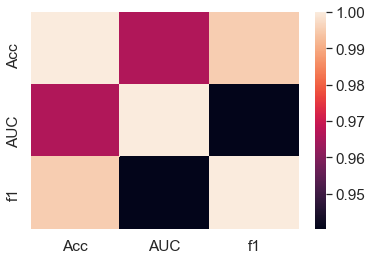

In [289]:
sns.heatmap(data_cor.corr())

# Membuat Confidence Interval Plot

### Accuracy

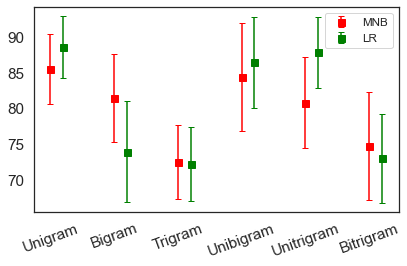

<Figure size 2160x1440 with 0 Axes>

In [290]:
import matplotlib.pyplot as plt
import numpy as np


x_ticks = ("Unigram", "Bigram", "Trigram", "Unibigram", 'Unitrigram', 'Bitrigram')
loc_mnb = np.arange(1,7)
loc_lr = loc_mnb + 0.2

acc_mnb = np.array([85.53, 81.54, 72.56, 84.47, 80.88, 74.80])
acc_lr = np.array([88.61, 74.03, 72.27, 86.49, 87.91, 73.11])

err_mnb = np.array([2.43, 3.07, 2.58, 3.76, 3.18, 3.74])
err_lr = np.array([2.15, 3.55, 2.56, 3.18, 2.49, 3.11])

plt.errorbar(x=loc_mnb, y=acc_mnb, yerr=2*err_mnb, color="red", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="red", mec="red")

plt.errorbar(x=loc_lr, y=acc_lr, yerr=2*err_lr, color="green", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="green", mec="green")

plt.xticks(loc_mnb, x_ticks, rotation=20)

plt.legend(labels=['MNB', 'LR'], loc='upper right', fontsize = 'x-small')
plt.tight_layout()
plt.figure(figsize=(30,20))
plt.show()

### AUC

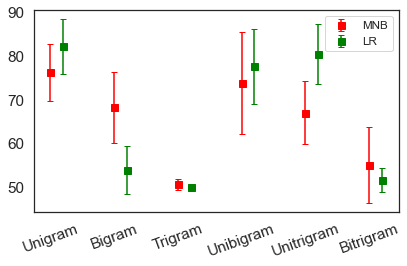

<Figure size 2160x1440 with 0 Axes>

In [291]:
import matplotlib.pyplot as plt
import numpy as np


x_ticks = ("Unigram", "Bigram", "Trigram", "Unibigram", 'Unitrigram', 'Bitrigram')
loc_mnb = np.arange(1,7)
loc_lr = loc_mnb + 0.2

auc_mnb = np.array([76.25, 68.24, 50.59, 73.84, 67.03, 55.07])
auc_lr = np.array([82.20, 53.91, 50.00, 77.61, 80.49, 51.62])

err_mnb = np.array([3.26, 4.09, 0.58, 5.86, 3.59, 4.34])
err_lr = np.array([3.11, 2.71, 0, 4.34, 3.46, 1.37])

plt.errorbar(x=loc_mnb, y=auc_mnb, yerr=2*err_mnb, color="red", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="red", mec="red")

plt.errorbar(x=loc_lr, y=auc_lr, yerr=2*err_lr, color="green", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="green", mec="green")

plt.xticks(loc_mnb, x_ticks, rotation=20)

plt.legend(labels=['MNB', 'LR'], loc='upper right', fontsize = 'x-small')
plt.tight_layout()
plt.figure(figsize=(30,20))
plt.show()

### F1-score

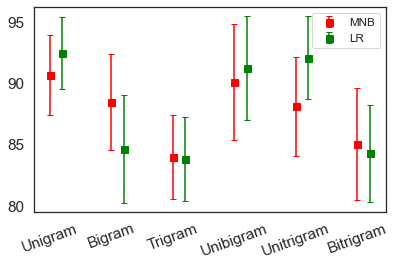

<Figure size 2160x1440 with 0 Axes>

In [292]:
import matplotlib.pyplot as plt
import numpy as np


x_ticks = ("Unigram", "Bigram", "Trigram", "Unibigram", 'Unitrigram', 'Bitrigram')
loc_mnb = np.arange(1,7)
loc_lr = loc_mnb + 0.2

f1_mnb = np.array([90.67, 88.48, 84.02, 90.12, 88.13, 85.08])
f1_lr = np.array([92.46, 84.67, 83.88, 91.26, 92.08, 84.30])

err_mnb = np.array([1.63, 1.95, 1.71, 2.37, 2.03, 2.28])
err_lr = np.array([1.47, 2.19, 1.71, 2.10, 1.69, 1.99])

plt.errorbar(x=loc_mnb, y=f1_mnb, yerr=2*err_mnb, color="red", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="red", mec="red")

plt.errorbar(x=loc_lr, y=f1_lr, yerr=2*err_lr, color="green", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="green", mec="green")

plt.xticks(loc_mnb, x_ticks, rotation=20)

plt.legend(labels=['MNB', 'LR'], loc='upper right', fontsize = 'x-small')
plt.tight_layout()
plt.figure(figsize=(30,20))
plt.show()

# Two way manova

In [293]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula('Acc + AUC + f1 ~ Algorithm + NGram + Algorithm * NGram', data=aku_auc_f1)
print(maov.mv_test())

#Algorithma berpengaruh & NGram berpengaruh

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0002 3.0000 106.0000 228588.5092 0.0000
         Pillai's trace    0.9998 3.0000 106.0000 228588.5092 0.0000
 Hotelling-Lawley trace 6469.4861 3.0000 106.0000 228588.5092 0.0000
    Roy's greatest root 6469.4861 3.0000 106.0000 228588.5092 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
          Algorithm         Value   Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
             Wilks' lambda  0.3633  3.0000  106.0000 

In [294]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula('Acc + AUC + f1 ~ Algorithm + NGram', data=aku_auc_f1)
print(maov.mv_test())

#Algorithma berpengaruh & NGram berpengaruh

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0001 3.0000 111.0000 314333.9113 0.0000
         Pillai's trace    0.9999 3.0000 111.0000 314333.9113 0.0000
 Hotelling-Lawley trace 8495.5111 3.0000 111.0000 314333.9113 0.0000
    Roy's greatest root 8495.5111 3.0000 111.0000 314333.9113 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
          Algorithm         Value   Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
             Wilks' lambda  0.8744  3.0000  111.0000 

## Uji t untuk selisih RL dan MNB

## MNB uni vs LR uni

In [295]:
import scipy.stats as stats
mnb_uni = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'uni']
lr_uni = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'uni']

<ipython-input-295-fcfcad208334>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mnb_uni = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'uni']
<ipython-input-295-fcfcad208334>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lr_uni = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'uni']


In [296]:
import numpy as np
mnb_uni_acc = np.array(mnb_uni['Acc'])
lr_uni_acc = np.array(lr_uni['Acc'])
d_uni_acc = np.subtract(mnb_uni_acc, lr_uni_acc)

mnb_uni_auc = np.array(mnb_uni['AUC'])
lr_uni_auc = np.array(lr_uni['AUC'])
d_uni_auc = np.subtract(mnb_uni_auc, lr_uni_auc)

mnb_uni_f1 = np.array(mnb_uni['f1'])
lr_uni_f1 = np.array(lr_uni['f1'])
d_uni_f1 = np.subtract(mnb_uni_f1, lr_uni_f1)

from scipy.stats import shapiro
print('Saphiro acc: ',shapiro(d_uni_acc))
print('Saphiro auc: ',shapiro(d_uni_auc))
print('Saphiro f1: ',shapiro(d_uni_f1))

Saphiro acc:  ShapiroResult(statistic=0.9892407655715942, pvalue=0.995805561542511)
Saphiro auc:  ShapiroResult(statistic=0.9374329447746277, pvalue=0.5248189568519592)
Saphiro f1:  ShapiroResult(statistic=0.9734797477722168, pvalue=0.9211007356643677)


In [297]:
print('Hasil uji t tes akurasi: ', stats.ttest_rel(mnb_uni['Acc'], lr_uni['Acc']))
print('Hasil uji t tes AUC: ', stats.ttest_rel(mnb_uni['AUC'], lr_uni['AUC']))
print('Hasil uji t tes f1: ', stats.ttest_rel(mnb_uni['f1'], lr_uni['f1']))

Hasil uji t tes akurasi:  Ttest_relResult(statistic=-5.74256055736772, pvalue=0.00027889899451069317)
Hasil uji t tes AUC:  Ttest_relResult(statistic=-6.727323297107765, pvalue=8.58282655445134e-05)
Hasil uji t tes f1:  Ttest_relResult(statistic=-5.3837484239702365, pvalue=0.00044231693348974617)


## MNB bi vs LR bi

In [298]:
import scipy.stats as stats
mnb_bi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'bi']
lr_bi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'bi']



<ipython-input-298-6eb20ba26424>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mnb_bi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'bi']
<ipython-input-298-6eb20ba26424>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lr_bi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'bi']


In [299]:
import numpy as np
mnb_bi_acc = np.array(mnb_bi['Acc'])
lr_bi_acc = np.array(lr_bi['Acc'])
d_bi_acc = np.subtract(mnb_bi_acc, lr_bi_acc)

mnb_bi_auc = np.array(mnb_bi['AUC'])
lr_bi_auc = np.array(lr_bi['AUC'])
d_bi_auc = np.subtract(mnb_bi_auc, lr_bi_auc)

mnb_bi_f1 = np.array(mnb_bi['f1'])
lr_bi_f1 = np.array(lr_bi['f1'])
d_bi_f1 = np.subtract(mnb_bi_f1, lr_bi_f1)

from scipy.stats import shapiro
print('Saphiro acc: ',shapiro(d_bi_acc))
print('Saphiro auc: ',shapiro(d_bi_auc))
print('Saphiro f1: ',shapiro(d_bi_f1))

Saphiro acc:  ShapiroResult(statistic=0.8693180680274963, pvalue=0.09815164655447006)
Saphiro auc:  ShapiroResult(statistic=0.859887421131134, pvalue=0.0760759487748146)
Saphiro f1:  ShapiroResult(statistic=0.846903920173645, pvalue=0.05335957184433937)


In [300]:
print('Hasil uji t tes akurasi: ', stats.ttest_rel(mnb_bi['Acc'], lr_bi['Acc']))
print('Hasil uji t tes AUC: ', stats.ttest_rel(mnb_bi['AUC'], lr_bi['AUC']))
print('Hasil uji t tes f1: ', stats.ttest_rel(mnb_bi['f1'], lr_bi['f1']))

Hasil uji t tes akurasi:  Ttest_relResult(statistic=9.887961165763514, pvalue=3.929743157189992e-06)
Hasil uji t tes AUC:  Ttest_relResult(statistic=10.881989166985063, pvalue=1.7631297232132524e-06)
Hasil uji t tes f1:  Ttest_relResult(statistic=9.796555505783534, pvalue=4.244781468204173e-06)


## MNB tri vs LR tri

In [301]:
import scipy.stats as stats
mnb_tri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'tri']
lr_tri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'tri']



<ipython-input-301-87f6f78b04f3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mnb_tri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'tri']
<ipython-input-301-87f6f78b04f3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lr_tri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'tri']


In [302]:
import numpy as np
mnb_tri_acc = np.array(mnb_tri['Acc'])
lr_tri_acc = np.array(lr_tri['Acc'])
d_tri_acc = np.subtract(mnb_tri_acc, lr_tri_acc)

mnb_tri_auc = np.array(mnb_tri['AUC'])
lr_tri_auc = np.array(lr_tri['AUC'])
d_tri_auc = np.subtract(mnb_tri_auc, lr_tri_auc)

mnb_tri_f1 = np.array(mnb_tri['f1'])
lr_tri_f1 = np.array(lr_tri['f1'])
d_tri_f1 = np.subtract(mnb_tri_f1, lr_tri_f1)

from scipy.stats import shapiro
print('Saphiro acc: ',shapiro(d_tri_acc))
print('Saphiro auc: ',shapiro(d_tri_auc))
print('Saphiro f1: ',shapiro(d_tri_f1))

Saphiro acc:  ShapiroResult(statistic=0.7562553286552429, pvalue=0.004253002814948559)
Saphiro auc:  ShapiroResult(statistic=0.8387033939361572, pvalue=0.04257331043481827)
Saphiro f1:  ShapiroResult(statistic=0.8053761124610901, pvalue=0.016851045191287994)


In [303]:
print('Hasil uji t tes akurasi: ', stats.ttest_rel(mnb_tri['Acc'], lr_tri['Acc']))
print('Hasil uji t tes AUC: ', stats.ttest_rel(mnb_tri['AUC'], lr_tri['AUC']))
print('Hasil uji t tes f1: ', stats.ttest_rel(mnb_tri['f1'], lr_tri['f1']))

Hasil uji t tes akurasi:  Ttest_relResult(statistic=2.7603729065560594, pvalue=0.022098676189232544)
Hasil uji t tes AUC:  Ttest_relResult(statistic=3.184960686702738, pvalue=0.011096005957373922)
Hasil uji t tes f1:  Ttest_relResult(statistic=2.571870054426792, pvalue=0.030095327550339415)


In [304]:
#Wilcoxon sign rank test
import scipy.stats as stats

print('Hasil uji t tes akurasi: ', stats.wilcoxon(mnb_tri['Acc'], lr_tri['Acc']))
print('Hasil uji t tes AUC: ', stats.wilcoxon(mnb_tri['AUC'], lr_tri['AUC']))
print('Hasil uji t tes f1: ', stats.wilcoxon(mnb_tri['f1'], lr_tri['f1']))

Hasil uji t tes akurasi:  WilcoxonResult(statistic=0.0, pvalue=0.041226833337163676)
Hasil uji t tes AUC:  WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)
Hasil uji t tes f1:  WilcoxonResult(statistic=1.0, pvalue=0.045799589111186666)


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:3159: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## MNB unibi vs LR unibi

In [305]:
import scipy.stats as stats
mnb_unibi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'unibi']
lr_unibi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'unibi']

<ipython-input-305-30f378b52b95>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mnb_unibi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'unibi']
<ipython-input-305-30f378b52b95>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lr_unibi = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'unibi']


In [306]:
import numpy as np
mnb_unibi_acc = np.array(mnb_unibi['Acc'])
lr_unibi_acc = np.array(lr_unibi['Acc'])
d_unibi_acc = np.subtract(mnb_unibi_acc, lr_unibi_acc)

mnb_unibi_auc = np.array(mnb_unibi['AUC'])
lr_unibi_auc = np.array(lr_unibi['AUC'])
d_unibi_auc = np.subtract(mnb_unibi_auc, lr_unibi_auc)

mnb_unibi_f1 = np.array(mnb_unibi['f1'])
lr_unibi_f1 = np.array(lr_unibi['f1'])
d_unibi_f1 = np.subtract(mnb_unibi_f1, lr_unibi_f1)

from scipy.stats import shapiro
print('Saphiro acc: ',shapiro(d_unibi_acc))
print('Saphiro auc: ',shapiro(d_unibi_auc))
print('Saphiro f1: ',shapiro(d_unibi_f1))

Saphiro acc:  ShapiroResult(statistic=0.9018402099609375, pvalue=0.22950148582458496)
Saphiro auc:  ShapiroResult(statistic=0.9254043698310852, pvalue=0.4042389392852783)
Saphiro f1:  ShapiroResult(statistic=0.8991081714630127, pvalue=0.21420560777187347)


In [307]:
print('Hasil uji t tes akurasi: ', stats.ttest_rel(mnb_unibi['Acc'], lr_unibi['Acc']))
print('Hasil uji t tes AUC: ', stats.ttest_rel(mnb_unibi['AUC'], lr_unibi['AUC']))
print('Hasil uji t tes f1: ', stats.ttest_rel(mnb_unibi['f1'], lr_unibi['f1']))

Hasil uji t tes akurasi:  Ttest_relResult(statistic=-2.144548176014093, pvalue=0.06057150859667105)
Hasil uji t tes AUC:  Ttest_relResult(statistic=-2.105860603579782, pvalue=0.0645018012897694)
Hasil uji t tes f1:  Ttest_relResult(statistic=-2.096663815461982, pvalue=0.06547175381164334)


## MNB unitri vs LR unitri

In [308]:
import scipy.stats as stats
mnb_unitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'unitri']
lr_unitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'unitri']



<ipython-input-308-a993df6247e4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mnb_unitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'unitri']
<ipython-input-308-a993df6247e4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lr_unitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'unitri']


In [309]:
import numpy as np
mnb_unitri_acc = np.array(mnb_unitri['Acc'])
lr_unitri_acc = np.array(lr_unitri['Acc'])
d_unitri_acc = np.subtract(mnb_unitri_acc, lr_unitri_acc)

mnb_unitri_auc = np.array(mnb_unitri['AUC'])
lr_unitri_auc = np.array(lr_unitri['AUC'])
d_unitri_auc = np.subtract(mnb_unitri_auc, lr_unitri_auc)

mnb_unitri_f1 = np.array(mnb_unitri['f1'])
lr_unitri_f1 = np.array(lr_unitri['f1'])
d_unitri_f1 = np.subtract(mnb_unitri_f1, lr_unitri_f1)

from scipy.stats import shapiro
print('Saphiro acc: ',shapiro(d_unitri_acc))
print('Saphiro auc: ',shapiro(d_unitri_auc))
print('Saphiro f1: ',shapiro(d_unitri_f1))

Saphiro acc:  ShapiroResult(statistic=0.9215589761734009, pvalue=0.37014147639274597)
Saphiro auc:  ShapiroResult(statistic=0.9128739833831787, pvalue=0.30132171511650085)
Saphiro f1:  ShapiroResult(statistic=0.9232644438743591, pvalue=0.3849879503250122)


In [310]:
print('Hasil uji t tes akurasi: ', stats.ttest_rel(mnb_unitri['Acc'], lr_unitri['Acc']))
print('Hasil uji t tes AUC: ', stats.ttest_rel(mnb_unitri['AUC'], lr_unitri['AUC']))
print('Hasil uji t tes f1: ', stats.ttest_rel(mnb_unitri['f1'], lr_unitri['f1']))

Hasil uji t tes akurasi:  Ttest_relResult(statistic=-8.491927902337087, pvalue=1.3698983582368645e-05)
Hasil uji t tes AUC:  Ttest_relResult(statistic=-10.578022754047103, pvalue=2.237225659058064e-06)
Hasil uji t tes f1:  Ttest_relResult(statistic=-8.22256924002726, pvalue=1.776542971487032e-05)


## MNB bitri vs LR bitri

In [311]:
import scipy.stats as stats
mnb_bitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'bitri']
lr_bitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'bitri']

<ipython-input-311-b607fa2b51f7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mnb_bitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'mnb'][aku_auc_f1['NGram'] == 'bitri']
<ipython-input-311-b607fa2b51f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lr_bitri = aku_auc_f1[aku_auc_f1['Algorithm'] == 'lr'][aku_auc_f1['NGram'] == 'bitri']


In [312]:
import numpy as np
mnb_bitri_acc = np.array(mnb_bitri['Acc'])
lr_bitri_acc = np.array(lr_bitri['Acc'])
d_bitri_acc = np.subtract(mnb_bitri_acc, lr_bitri_acc)

mnb_bitri_auc = np.array(mnb_bitri['AUC'])
lr_bitri_auc = np.array(lr_bitri['AUC'])
d_bitri_auc = np.subtract(mnb_bitri_auc, lr_bitri_auc)

mnb_bitri_f1 = np.array(mnb_bitri['f1'])
lr_bitri_f1 = np.array(lr_bitri['f1'])
d_bitri_f1 = np.subtract(mnb_bitri_f1, lr_bitri_f1)

from scipy.stats import shapiro
print('Saphiro acc: ',shapiro(d_bitri_acc))
print('Saphiro auc: ',shapiro(d_bitri_auc))
print('Saphiro f1: ',shapiro(d_bitri_f1))

Saphiro acc:  ShapiroResult(statistic=0.9103978872299194, pvalue=0.28373557329177856)
Saphiro auc:  ShapiroResult(statistic=0.924908459186554, pvalue=0.39971619844436646)
Saphiro f1:  ShapiroResult(statistic=0.8873274326324463, pvalue=0.15818993747234344)


In [313]:
print('Hasil uji t tes akurasi: ', stats.ttest_rel(mnb_bitri['Acc'], lr_bitri['Acc']))
print('Hasil uji t tes AUC: ', stats.ttest_rel(mnb_bitri['AUC'], lr_bitri['AUC']))
print('Hasil uji t tes f1: ', stats.ttest_rel(mnb_bitri['f1'], lr_bitri['f1']))

Hasil uji t tes akurasi:  Ttest_relResult(statistic=2.4541712276754253, pvalue=0.03650606070378447)
Hasil uji t tes AUC:  Ttest_relResult(statistic=2.3886519012767713, pvalue=0.04064711857194531)
Hasil uji t tes f1:  Ttest_relResult(statistic=2.2672074400269855, pvalue=0.049588939798067826)


# Uji Tukey

## Tukey Akurasi

In [314]:
data_tukey_acc = pd.DataFrame({'lr uni': list_akurasi_lr_uni_tes,
                          'mnb bi': list_akurasi_mnb_bi_tes,
                           'mnb tri': list_akurasi_mnb_tri_tes,
                           'mnb unibi': list_akurasi_mnb_unibi_tes,
                           'lr unibi': list_akurasi_lr_unibi_tes,
                           'lr unitri': list_akurasi_lr_unitri_tes,
                           'mnb bitri': list_akurasi_mnb_bitri_tes
                          })
data_tukey_acc_melt = data_tukey_acc.melt(var_name='Method', value_name='Acc')
data_tukey_acc_melt

,Method,Acc
0,lr uni,0.8974
1,lr uni,0.8974
2,lr uni,0.8755
3,lr uni,0.9121
4,lr uni,0.8864
...,...,...
65,mnb bitri,0.7399
66,mnb bitri,0.6996
67,mnb bitri,0.7253
68,mnb bitri,0.7436


In [315]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_acc = pairwise_tukeyhsd(endog=data_tukey_acc_melt['Acc'],
                          groups=data_tukey_acc_melt['Method'],
                          alpha=0.05)
print(tukey_acc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   lr uni  lr unibi  -0.0212 0.7106 -0.0628  0.0203  False
   lr uni lr unitri  -0.0069 0.9986 -0.0485  0.0346  False
   lr uni    mnb bi  -0.0707    0.0 -0.1122 -0.0291   True
   lr uni mnb bitri  -0.1381    0.0 -0.1796 -0.0965   True
   lr uni   mnb tri  -0.1604   -0.0  -0.202 -0.1189   True
   lr uni mnb unibi  -0.0414 0.0517 -0.0829  0.0002  False
 lr unibi lr unitri   0.0143  0.941 -0.0273  0.0558  False
 lr unibi    mnb bi  -0.0495 0.0099  -0.091 -0.0079   True
 lr unibi mnb bitri  -0.1169    0.0 -0.1584 -0.0753   True
 lr unibi   mnb tri  -0.1392    0.0 -0.1808 -0.0977   True
 lr unibi mnb unibi  -0.0202 0.7569 -0.0617  0.0214  False
lr unitri    mnb bi  -0.0637 0.0003 -0.1053 -0.0222   True
lr unitri mnb bitri  -0.1311    0.0 -0.1727 -0.0896   True
lr unitri   mnb tri  -0.1535   -0.0  -0.195 -0.1119   Tr

## Tukey AUC

In [316]:
data_tukey_auc = pd.DataFrame({'lr uni': list_auc_lr_uni_tes,
                          'mnb bi': list_auc_mnb_bi_tes,
                           'mnb tri': list_auc_mnb_tri_tes,
                           'mnb unibi': list_auc_mnb_unibi_tes,
                           'lr unibi': list_auc_lr_unibi_tes,
                           'lr unitri': list_auc_lr_unitri_tes,
                           'mnb bitri': list_auc_mnb_bitri_tes
                          })
data_tukey_auc_melt = data_tukey_auc.melt(var_name='Method', value_name='auc')
data_tukey_auc_melt

,Method,auc
0,lr uni,0.825447
1,lr uni,0.848116
2,lr uni,0.810847
3,lr uni,0.854859
4,lr uni,0.816010
...,...,...
65,mnb bitri,0.538961
66,mnb bitri,0.520870
67,mnb bitri,0.525316
68,mnb bitri,0.555128


In [317]:
#Tukey AUC
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_auc = pairwise_tukeyhsd(endog=data_tukey_auc_melt['auc'],
                          groups=data_tukey_auc_melt['Method'],
                          alpha=0.05)
print(tukey_auc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   lr uni  lr unibi  -0.0459 0.1499 -0.1001  0.0083  False
   lr uni lr unitri  -0.0171 0.9605 -0.0713  0.0371  False
   lr uni    mnb bi  -0.1396    0.0 -0.1938 -0.0854   True
   lr uni mnb bitri  -0.2713   -0.0 -0.3255 -0.2171   True
   lr uni   mnb tri  -0.3161   -0.0 -0.3703  -0.262   True
   lr uni mnb unibi  -0.0836 0.0003 -0.1378 -0.0294   True
 lr unibi lr unitri   0.0288 0.6705 -0.0254   0.083  False
 lr unibi    mnb bi  -0.0937    0.0 -0.1479 -0.0395   True
 lr unibi mnb bitri  -0.2254   -0.0 -0.2796 -0.1712   True
 lr unibi   mnb tri  -0.2703   -0.0 -0.3244 -0.2161   True
 lr unibi mnb unibi  -0.0377 0.3541 -0.0919  0.0165  False
lr unitri    mnb bi  -0.1225    0.0 -0.1767 -0.0683   True
lr unitri mnb bitri  -0.2542   -0.0 -0.3084    -0.2   True
lr unitri   mnb tri  -0.2991   -0.0 -0.3533 -0.2449   Tr

## Tukey f1

In [318]:
data_tukey_f1 = pd.DataFrame({'lr uni': list_f1_lr_uni_tes,
                          'mnb bi': list_f1_mnb_bi_tes,
                           'mnb tri': list_f1_mnb_tri_tes,
                           'mnb unibi': list_f1_mnb_unibi_tes,
                           'lr unibi': list_f1_lr_unibi_tes,
                           'lr unitri': list_f1_lr_unitri_tes,
                           'mnb bitri': list_f1_mnb_bitri_tes,
                            'lr bitri': list_f1_lr_bitri_tes
                          })
data_tukey_f1_melt = data_tukey_f1.melt(var_name='Method', value_name='f1')
data_tukey_f1_melt

,Method,f1
0,lr uni,0.9352
1,lr uni,0.9310
2,lr uni,0.9158
3,lr uni,0.9429
4,lr uni,0.9264
...,...,...
75,lr bitri,0.8394
76,lr bitri,0.8156
77,lr bitri,0.8344
78,lr bitri,0.8387


In [319]:
#Tukey AUC
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_f1 = pairwise_tukeyhsd(endog=data_tukey_f1_melt['f1'],
                          groups=data_tukey_f1_melt['Method'],
                          alpha=0.05)
print(tukey_f1)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 lr bitri    lr uni   0.0817    0.0  0.0542  0.1091   True
 lr bitri  lr unibi   0.0697    0.0  0.0423  0.0971   True
 lr bitri lr unitri   0.0778    0.0  0.0504  0.1053   True
 lr bitri    mnb bi   0.0419 0.0002  0.0144  0.0693   True
 lr bitri mnb bitri   0.0079 0.9858 -0.0196  0.0353  False
 lr bitri   mnb tri  -0.0028    1.0 -0.0302  0.0247  False
 lr bitri mnb unibi   0.0583    0.0  0.0308  0.0857   True
   lr uni  lr unibi   -0.012  0.872 -0.0394  0.0155  False
   lr uni lr unitri  -0.0038 0.9999 -0.0313  0.0236  False
   lr uni    mnb bi  -0.0398 0.0006 -0.0672 -0.0124   True
   lr uni mnb bitri  -0.0738    0.0 -0.1012 -0.0464   True
   lr uni   mnb tri  -0.0844    0.0 -0.1119  -0.057   True
   lr uni mnb unibi  -0.0234 0.1524 -0.0508  0.0041  False
 lr unibi lr unitri   0.0081 0.9826 -0.0193  0.0356  Fal

# Prediksi

In [320]:
import pandas as pd
data_predict = pd.read_excel('Butuh Prediksi (1).xlsx')

In [321]:
import re
import string

data_predict['Review'] = data_predict['Review'].str.lower()

def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

data_predict['Review'] = data_predict['Review'].apply(remove_special)

def remove_number(text):
    return re.sub(r'[0-9]', "", text)
data_predict['Review'] = data_predict['Review'].apply(remove_number)

def remove_punctuation(text):
    return re.sub('\W+\s*', ' ', text)
data_predict['Review'] = data_predict['Review'].apply(remove_punctuation)

def remove_whitespace_LT(text):
    return text.strip()
data_predict['Review'] = data_predict['Review'].apply(remove_whitespace_LT)

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
data_predict['Review'] = data_predict['Review'].apply(remove_whitespace_multiple)

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
data_predict['Review'] = data_predict['Review'].apply(remove_singl_char)

from nltk.tokenize import word_tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)
data_predict['Review'] = data_predict['Review'].apply(word_tokenize_wrapper)

data_predict.tail()

,reviewId,userName,userImage,Review,score,at,Sentiment
388,gp:AOqpTOF7q3Xh6VbvRu_XYFJkeUKFAbUVdIj8VnVQKLJ...,Danang Sasmi,https://play-lh.googleusercontent.com/a-/AOh14...,"[fitur, searchnya, gak, berfungsi]",1,2022-04-01 09:19:41,0
389,gp:AOqpTOE_5GE1sVNkIqfRpr0BGmxPqpyvOyXge3pkQMf...,Liimaya Resti,https://play-lh.googleusercontent.com/a-/AOh14...,"[luar, biasa, sayurbox, on, time, dan, kumplit...",5,2022-04-01 08:23:58,1
390,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,"[pengiriman, cepat, packing, aman, barang, fre...",5,2022-04-01 06:22:32,1
391,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,"[sesuai, pesanan, dan, kurirnya, ramah, mohon,...",5,2022-04-01 06:18:27,1
392,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...",5,2022-04-01 05:54:45,1


In [322]:
normalized_word = pd.read_excel('normalisasi.xlsx') 

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

data_predict['Review'] = data_predict['Review'].apply(normalized_term)
data_predict.tail()

,reviewId,userName,userImage,Review,score,at,Sentiment
388,gp:AOqpTOF7q3Xh6VbvRu_XYFJkeUKFAbUVdIj8VnVQKLJ...,Danang Sasmi,https://play-lh.googleusercontent.com/a-/AOh14...,"[fitur, searchnya, tidak, berfungsi]",1,2022-04-01 09:19:41,0
389,gp:AOqpTOE_5GE1sVNkIqfRpr0BGmxPqpyvOyXge3pkQMf...,Liimaya Resti,https://play-lh.googleusercontent.com/a-/AOh14...,"[luar, biasa, sayurbox, on, waktu, dan, komple...",5,2022-04-01 08:23:58,1
390,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,"[pengiriman, cepat, kemasan, aman, barang, seg...",5,2022-04-01 06:22:32,1
391,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,"[sesuai, pesanan, dan, kurirnya, ramah, mohon,...",5,2022-04-01 06:18:27,1
392,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...",5,2022-04-01 05:54:45,1


In [323]:
for i in range(0,len(data_predict['Review'])):
    data_predict.loc[i,'Review'] = ' '.join([str(elem) for elem in data_predict.loc[i,'Review']])

data_predict.tail()

,reviewId,userName,userImage,Review,score,at,Sentiment
388,gp:AOqpTOF7q3Xh6VbvRu_XYFJkeUKFAbUVdIj8VnVQKLJ...,Danang Sasmi,https://play-lh.googleusercontent.com/a-/AOh14...,fitur searchnya tidak berfungsi,1,2022-04-01 09:19:41,0
389,gp:AOqpTOE_5GE1sVNkIqfRpr0BGmxPqpyvOyXge3pkQMf...,Liimaya Resti,https://play-lh.googleusercontent.com/a-/AOh14...,luar biasa sayurbox on waktu dan komplet sanga...,5,2022-04-01 08:23:58,1
390,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,pengiriman cepat kemasan aman barang segar ter...,5,2022-04-01 06:22:32,1
391,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,sesuai pesanan dan kurirnya ramah mohon dipert...,5,2022-04-01 06:18:27,1
392,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,pengiriman tepat waktu pilihan tepat berbelanj...,5,2022-04-01 05:54:45,1


In [324]:
from nltk.tokenize import word_tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)
data_predict['Review'] = data_predict['Review'].apply(word_tokenize_wrapper)

In [325]:
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yang", "dan", "ancok", "guak", "mb", "ae", "cokcok", "jjj", "mstco", "bg", "kmrkbyvb",
                      "nr", "be", "uqjydehdje", "an", "kntl", "sg", "jwdnmbez", "sfarif", "pol", "polan", "wxvlezuvwss",
                      "ghifar", "sfomar", "ircelswjjw", "nzxx", "stangging", "ma", "kah", "pa", "on", "line",
                      "gan", "pinki", "annya", "do", "set", "dm", "hi", "kbb", "eitsss", "iyyveyzqkdgm", "pj",
                      "mfwdxrgz", "wes", "di", "dengan"])
list_stopwords.remove("belum")
list_stopwords.remove("tidak")
list_stopwords.remove("bukan")
list_stopwords.remove("baik")
list_stopwords.remove("enggak")
list_stopwords.remove("jangan")
list_stopwords.remove("kurang")
list_stopwords.remove("tak")

# convert list to dictionary
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_predict['Review'] = data_predict['Review'].apply(stopwords_removal)

In [326]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def convertToString(term):
      if type(term) is str:
        return term
      else:
        return str(term)
    
# stemmed
def stemmed_wrapper(term):
    def convertToString(term):
      if type(term) is str:
        return term
      else:
        return str(term)
    return stemmer.stem(convertToString(term))


term_dict = {}

for document in data_predict['Review']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = convertToString(term)
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to data_predictframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_predict['hasil praproses'] = data_predict['Review'].swifter.apply(get_stemmed_term)
data_predict['token'] = data_predict['Review'].swifter.apply(get_stemmed_term)
print(data_predict['hasil praproses'])

758
------------------------
puas : puas
belanja : belanja
produk : produk
kualitasnya : kualitas
bagus : bagus
harga : harga
bersaing : saing
kali : kali
pesan : pesan
senang : senang
voucer : voucer
murah : murah
pasar : pasar
kualitas : kualitas
top : top
dianterin : dianterin
pintu : pintu
adakan : adakan
promo : promo
kasih : kasih
poin : poin
tambahan : tambah
ya : ya
ui : ui
nya : nya
dibagusin : dibagusin
biar : biar
selamat : selamat
tinggal : tinggal
sayur : sayur
kardus : kardus
menemani : tani
pembelanjaan : belanja
gratis : gratis
ongnya : ong
tidak : tidak
hapus : hapus
meringankan : ringan
pembelian : beli
beli : beli
buah : buah
dikirim : kirim
mentah : mentah
telepon : telepon
pusat : pusat
membantu : bantu
memuaskan : muas
baik : baik
produknya : produk
segi : segi
pengiriman : kirim
pelayanan : layan
konsumen : konsumen
pelayanannya : layan
profesional : profesional
menjaga : jaga
pelanggan : langgan
nyaman : nyaman
berbelanja : belanja
terima : terima
team : team
sg

Pandas Apply:   0%|          | 0/393 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/393 [00:00<?, ?it/s]

0      [puas, belanja, produk, kualitas, bagus, harga...
1      [senang, belanja, voucer, murah, harga, harga,...
2      [selamat, tinggal, sayur, kardus, tani, belanj...
3      [beli, buah, kirim, mentah, telepon, pusat, ny...
4      [beli, muas, baik, produk, segi, kirim, layan,...
                             ...                        
388                    [fitur, searchnya, tidak, fungsi]
389    [sayurbox, komplet, moga, sukses, kembang, say...
390    [kirim, cepat, kemas, aman, barang, segar, ter...
391          [sesuai, pesan, kurir, ramah, mohon, tahan]
392    [kirim, pilih, belanja, sayur, buah, sila, jan...
Name: hasil praproses, Length: 393, dtype: object


In [327]:
for i in range(0,len(data_predict['hasil praproses'])):
    data_predict.loc[i,'hasil praproses'] = ' '.join([str(elem) for elem in data_predict.loc[i,'hasil praproses']])

In [328]:
ind = data_predict[data_predict['hasil praproses'] == ''].index
data_predict.drop(ind, inplace=True)
data_predict

,reviewId,userName,userImage,Review,score,at,Sentiment,hasil praproses,token
0,gp:AOqpTOF51AprTTSXEQkGmAwUD6xvgigvh1ESYcHanwG...,Rani Mahardani,https://play-lh.googleusercontent.com/a/AATXAJ...,"[puas, belanja, produk, kualitasnya, bagus, ha...",5,2022-05-30 12:22:51,1,puas belanja produk kualitas bagus harga saing...,"[puas, belanja, produk, kualitas, bagus, harga..."
1,gp:AOqpTOGAWUyqajxaYtHwTqwo1WzkYLoU1aTMHBe7kYx...,ika mulyanah,https://play-lh.googleusercontent.com/a-/AOh14...,"[senang, belanja, voucer, murah, harga, harga,...",5,2022-05-29 15:36:05,1,senang belanja voucer murah harga harga pasar ...,"[senang, belanja, voucer, murah, harga, harga,..."
2,gp:AOqpTOHjgLbeKUD-C1someVijE8vtbXyzfe-dgRkr_8...,ratih pribandini,https://play-lh.googleusercontent.com/a-/AOh14...,"[selamat, tinggal, sayur, kardus, menemani, pe...",2,2022-05-29 12:13:37,0,selamat tinggal sayur kardus tani belanja grat...,"[selamat, tinggal, sayur, kardus, tani, belanj..."
3,gp:AOqpTOGNPXElbqIP-ZpXG74gu51D2cYV5D55t_pwkhX...,cia,https://play-lh.googleusercontent.com/a-/AOh14...,"[beli, buah, dikirim, mentah, telepon, pusat, ...",1,2022-05-29 00:28:10,0,beli buah kirim mentah telepon pusat nya tidak...,"[beli, buah, kirim, mentah, telepon, pusat, ny..."
4,gp:AOqpTOHjmH1ku4z-Z_yuc7m-hgufOvfE0uODZ_QIHf8...,Tia Nursari,https://play-lh.googleusercontent.com/a/AATXAJ...,"[beli, memuaskan, baik, produknya, segi, pengi...",5,2022-05-28 11:44:04,1,beli muas baik produk segi kirim layan konsume...,"[beli, muas, baik, produk, segi, kirim, layan,..."
...,...,...,...,...,...,...,...,...,...
388,gp:AOqpTOF7q3Xh6VbvRu_XYFJkeUKFAbUVdIj8VnVQKLJ...,Danang Sasmi,https://play-lh.googleusercontent.com/a-/AOh14...,"[fitur, searchnya, tidak, berfungsi]",1,2022-04-01 09:19:41,0,fitur searchnya tidak fungsi,"[fitur, searchnya, tidak, fungsi]"
389,gp:AOqpTOE_5GE1sVNkIqfRpr0BGmxPqpyvOyXge3pkQMf...,Liimaya Resti,https://play-lh.googleusercontent.com/a-/AOh14...,"[sayurbox, komplet, semoga, sukses, berkembang...",5,2022-04-01 08:23:58,1,sayurbox komplet moga sukses kembang sayurbox ...,"[sayurbox, komplet, moga, sukses, kembang, say..."
390,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,"[pengiriman, cepat, kemasan, aman, barang, seg...",5,2022-04-01 06:22:32,1,kirim cepat kemas aman barang segar terima kas...,"[kirim, cepat, kemas, aman, barang, segar, ter..."
391,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",5,2022-04-01 06:18:27,1,sesuai pesan kurir ramah mohon tahan,"[sesuai, pesan, kurir, ramah, mohon, tahan]"


In [329]:
data_train = data
X_train = data_train['hasil praproses']
y_train = data_train['Sentiment']
X_test = data_predict['hasil praproses']
y_test = data_predict['Sentiment']
    
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
    
#Vectorizing the text data
X_train_tfidf = tf.fit_transform(X_train)
X_test_tfidf = tf.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
    
y_pred_lr_train = lr.predict(X_train_tfidf)
y_pred_lr_tes = lr.predict(X_test_tfidf)
    
from sklearn.metrics import confusion_matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_lr_train).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_lr_tes).ravel()
    
    
accuracy1 = round((tp1+tn1)/(tp1 +tn1 + fp1 + fn1), 4)
sen1 = round(tp1/(tp1 + fn1), 4)
spe1 = round(tn1/(tn1+fp1), 4)
f11 = round(2*tp1/(2*tp1 + fp1 + fn1), 4)
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train, y_pred_lr_train)

accuracy2 = round((tp2+tn2)/(tp2 +tn2 + fp2 + fn2), 4)
sen2 = round(tp2/(tp2 + fn2), 4)
spe2 = round(tn2/(tn2+fp2), 4)
f12= round(2*tp2/(2*tp2 + fp2 + fn2), 4)
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(y_test, y_pred_lr_tes)
    
data_predict['Hasil Prediksi'] = y_pred_lr_tes

In [330]:
print(confusion_matrix(y_test, y_pred_lr_tes).ravel())

[ 30  17  13 330]


In [331]:
auc2

0.8001984988524286

In [332]:
data_predict.to_excel('data prediksi.xlsx')

## Hasil Prediksi

In [333]:
data_hasil = pd.read_excel('data prediksi.xlsx')
data_hasil.head()

,Unnamed: 0,reviewId,userName,userImage,Review,score,at,Sentiment,hasil praproses,token,Hasil Prediksi
0,0,gp:AOqpTOF51AprTTSXEQkGmAwUD6xvgigvh1ESYcHanwG...,Rani Mahardani,https://play-lh.googleusercontent.com/a/AATXAJ...,"['puas', 'belanja', 'produk', 'kualitasnya', '...",5,2022-05-30 12:22:51,1,puas belanja produk kualitas bagus harga saing...,"['puas', 'belanja', 'produk', 'kualitas', 'bag...",1
1,1,gp:AOqpTOGAWUyqajxaYtHwTqwo1WzkYLoU1aTMHBe7kYx...,ika mulyanah,https://play-lh.googleusercontent.com/a-/AOh14...,"['senang', 'belanja', 'voucer', 'murah', 'harg...",5,2022-05-29 15:36:05,1,senang belanja voucer murah harga harga pasar ...,"['senang', 'belanja', 'voucer', 'murah', 'harg...",1
2,2,gp:AOqpTOHjgLbeKUD-C1someVijE8vtbXyzfe-dgRkr_8...,ratih pribandini,https://play-lh.googleusercontent.com/a-/AOh14...,"['selamat', 'tinggal', 'sayur', 'kardus', 'men...",2,2022-05-29 12:13:37,0,selamat tinggal sayur kardus tani belanja grat...,"['selamat', 'tinggal', 'sayur', 'kardus', 'tan...",1
3,3,gp:AOqpTOGNPXElbqIP-ZpXG74gu51D2cYV5D55t_pwkhX...,cia,https://play-lh.googleusercontent.com/a-/AOh14...,"['beli', 'buah', 'dikirim', 'mentah', 'telepon...",1,2022-05-29 00:28:10,0,beli buah kirim mentah telepon pusat nya tidak...,"['beli', 'buah', 'kirim', 'mentah', 'telepon',...",1
4,4,gp:AOqpTOHjmH1ku4z-Z_yuc7m-hgufOvfE0uODZ_QIHf8...,Tia Nursari,https://play-lh.googleusercontent.com/a/AATXAJ...,"['beli', 'memuaskan', 'baik', 'produknya', 'se...",5,2022-05-28 11:44:04,1,beli muas baik produk segi kirim layan konsume...,"['beli', 'muas', 'baik', 'produk', 'segi', 'ki...",1


In [334]:
data_hasil['Month'] = data_hasil['at'].dt.month_name(locale = 'English')
data_hasil['Year'] = pd.to_datetime(data_hasil['at']).dt.year
data_hasil['Month Year'] = data_hasil['Month'].astype(str) + ' '+ data_hasil['Year'].astype(str)
from collections import Counter
Counter(data_hasil['Month Year'])

Counter({'May 2022': 167, 'April 2022': 223})

In [335]:
data_hasil_akhir = data_hasil[['Month Year', 'Hasil Prediksi']]
hasil = data_hasil_akhir.value_counts()
print(hasil)

Month Year  Hasil Prediksi
April 2022  1                 192
May 2022    1                 155
April 2022  0                  31
May 2022    0                  12
dtype: int64


In [336]:
content_neg = data_hasil['hasil praproses'][data_hasil['Hasil Prediksi'] == 0]
review_neg =''
for i in range(0,len(content_neg)):
    review_neg = ' '.join([str(elem) for elem in content_neg])

In [337]:
review_neg = review_neg.split()

In [338]:
review_neg_count = Counter(review_neg).most_common(11)
review_neg_count

[('tidak', 47),
 ('pesan', 15),
 ('nya', 14),
 ('aplikasi', 11),
 ('kirim', 10),
 ('kecewa', 10),
 ('barang', 10),
 ('alamat', 10),
 ('sayur', 9),
 ('kardus', 7),
 ('konsumen', 7)]

Text(0, 0.5, 'Frequency')

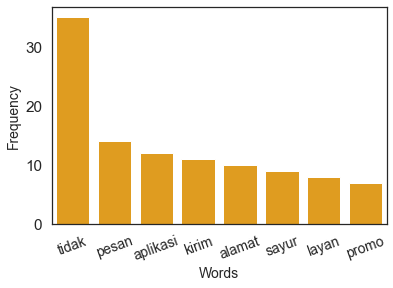

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {"Words":['tidak', 'pesan', 'aplikasi', 'kirim', 'alamat','sayur','layan','promo'],
        "Freq":[35,14,12,11,10,9,8,7]}
   
dataFrame = pd.DataFrame(data=data);

 # Draw a vertical bar chart
# grouped barplot
barchart = sns.barplot(data = dataFrame, x="Words", y= 'Freq', palette = ['orange'])
plt.xticks(size=14, rotation=20)
barchart.set_xlabel("Words", size=14)
barchart.set_ylabel("Frequency", size=14)
 


In [340]:
content_pos = data_hasil['hasil praproses'][data_hasil['Hasil Prediksi'] == 1]
review_pos =''
for i in range(0,len(content_pos)):
    review_pos = ' '.join([str(elem) for elem in content_pos])

review_pos = review_pos.split()

review_pos_count = Counter(review_pos).most_common(14)
review_pos_count

[('kirim', 84),
 ('bagus', 79),
 ('sayur', 73),
 ('cepat', 67),
 ('segar', 61),
 ('belanja', 50),
 ('kasih', 45),
 ('kardus', 44),
 ('terima', 44),
 ('nya', 41),
 ('sayurbox', 39),
 ('pesan', 35),
 ('mantap', 32),
 ('aplikasi', 28)]

Text(0, 0.5, 'Frequency')

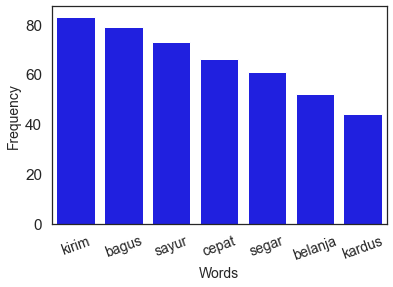

In [341]:
import pandas as pd
import matplotlib.pyplot as plot

data = {"Words":['kirim', 'bagus', 'sayur','cepat', 'segar', 'belanja','kardus'],
        "Freq":[83,79,73,66,61,52,44]}
   
dataFrame = pd.DataFrame(data=data);

 # Draw a vertical bar chart
# grouped barplot
barchart = sns.barplot(data = dataFrame, x="Words", y= 'Freq', palette = ['blue'])
plt.xticks(size=14, rotation=20)
barchart.set_xlabel("Words", size=14)
barchart.set_ylabel("Frequency", size=14)